In [ ]:
!rm -rf/content/*

rm: invalid option -- '/'
Try 'rm --help' for more information.


In [ ]:
! pip install kagglehub

In [ ]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 kB 9.5 MB/s eta 0:00:00


In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.5 MB/s eta 0:00:00


## 1. Import Library

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn .preprocessing import MinMaxScaler
from feature_engine.outliers import Winsorizer
import kagglehub
import math
import streamlit as st
from google.colab import files

## 2. Data Loading

In [ ]:
# Mengunduh dataset dari kaggle
dataset_path = kagglehub.dataset_download('jihyeseo/online-retail-data-set-from-uci-ml-repo')
print("Dataset berhasil diunduh di folder:", dataset_path)

100%|██████████| 21.8M/21.8M [00:00<00:00, 51.7MB/s]

Extracting files...


Dataset berhasil diunduh di folder: /root/.cache/kagglehub/datasets/jihyeseo/online-retail-data-set-from-uci-ml-repo/versions/1


In [ ]:
files = os.listdir(dataset_path)
file_path = os.path.join(dataset_path, files[0])

In [ ]:
df = pd.read_excel(file_path)

In [ ]:
csv_output_path = 'Online_Retail.csv'
df.to_csv(csv_output_path, index=False)
print("CSV berhasil disimpan di:", csv_output_path)

CSV berhasil disimpan di: Online_Retail.csv


In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


## 3. Data Cleaning
###### Dataset Online Retail ini memiliki beberapa masalah umum yang harus dibersihkan terlebih dahulu sebelum dilakukan EDA.

In [ ]:
#Membaca dataset
df_clean = pd.read_csv(csv_output_path)
df_clean.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
# Menghapus data duplikat
df = df.drop_duplicates().copy()
df.duplicated().sum()

np.int64(0)

In [ ]:
# Menghapus baris yang memiliki missing values (nilai kosong/NaN)
df_clean = df.dropna(subset=["CustomerID"])
df_clean.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
#Menghapus transaksi yang bernilai negatif
df_clean = df_clean[df_clean['Quantity'] > 0]
df_clean = df_clean[df_clean['UnitPrice'] > 0]
df_clean = df_clean[~df_clean['InvoiceNo'].astype(str).str.startswith('C')]
df_clean.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
# Membuat Total Price
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']
df_clean.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


In [ ]:
# Mengubah tipe data
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

In [ ]:
# Menghapus transaksi dengan Invoice bernilai Cancel (prefix "C")
df_clean = df_clean[~df_clean['InvoiceNo'].astype(str).str.startswith('C')]

In [ ]:
# Menghapus outlier
winsor = Winsorizer(
    capping_method='iqr',
    tail='both',
    variables=['Quantity', 'UnitPrice', 'TotalPrice'],
    fold=1.5
)

df = winsor.fit_transform(df_clean)

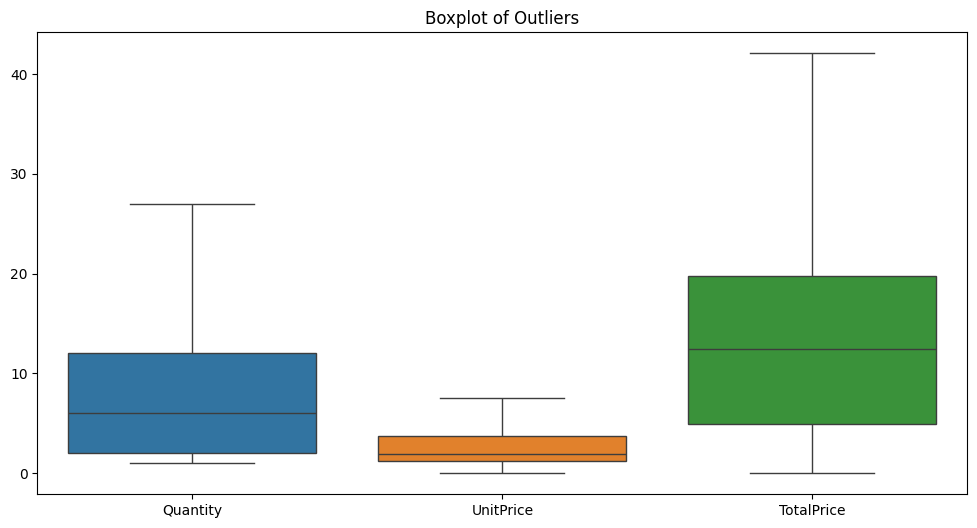

In [ ]:
# Visualisasi hasil outlier setelah di cleaning
plt.figure(figsize=(12, 6))
plt.subplot
sns.boxplot(data=df[['Quantity', 'UnitPrice', 'TotalPrice']])
plt.title("Boxplot of Outliers")
plt.show()

In [ ]:
# Menampilkan jumlah baris dan kolom setelah di cleaning
df.shape

(392692, 9)

### 4. Membagi Data Menjadi Global dan Lokal

In [ ]:
# memisahkan dataset menjadi local dan global
df_global = df.copy()
df_local = df[df['Country'] == 'United Kingdom'].copy()

## 5. Exploratory Data Analysis (EDA)
##### Tujuan Utama dari EDA ini adalah untuk memahami karakteristik data transaksi penjualan, mengidentifikasi pola pembelian, insight terkait produk, harga, pelanggan, serta tren penjualan dari waktu ke waktu.
##### Analisis mencakup beberapa bagian utama:
1. Analisis harga barang (distribusi, barang termurah & termahal)
2. Analisis performa produk (produk paling laku & paling jarang dibeli)
3. Analisis perilaku pelanggan (frekuensi pembelian dan total belanja)
4. Analisis tren waktu (jumlah transaksi & total belanja per bulan)
##### EDA ini dilakukan pada dua data:
- Data Global (all customers)
- Data Local (local customers)


### 5.1 Menampilkan Informasi Data Global dan Data Local

In [ ]:
# Menampilkan informasi struktur dataframe
df_global.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   TotalPrice   392692 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.0+ MB


In [ ]:
df_local.info()

<class 'pandas.core.frame.DataFrame'>
Index: 349203 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    349203 non-null  object        
 1   StockCode    349203 non-null  object        
 2   Description  349203 non-null  object        
 3   Quantity     349203 non-null  int64         
 4   InvoiceDate  349203 non-null  datetime64[ns]
 5   UnitPrice    349203 non-null  float64       
 6   CustomerID   349203 non-null  float64       
 7   Country      349203 non-null  object        
 8   TotalPrice   349203 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 26.6+ MB


In [ ]:
# Menampilkan statistik deskriptif dari kolom numerik dalam DataFrame.
df_global.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
count,392692.0,392692,392692,392692.000000,392692,392692.000000,392692.000000,392692,392692.000000
unique,18532.0,3665,3877,NaN,NaN,NaN,NaN,37,NaN
top,576339.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom,NaN
freq,542.0,2023,2016,NaN,NaN,NaN,NaN,349203,NaN
mean,NaN,NaN,NaN,8.393176,2011-07-10 19:13:07.771892480,2.602209,15287.843865,NaN,14.483715
min,NaN,NaN,NaN,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,NaN,0.001000
25%,NaN,NaN,NaN,2.000000,2011-04-07 11:12:00,1.250000,13955.000000,NaN,4.950000
50%,NaN,NaN,NaN,6.000000,2011-07-31 12:02:00,1.950000,15150.000000,NaN,12.450000
75%,NaN,NaN,NaN,12.000000,2011-10-20 12:53:00,3.750000,16791.000000,NaN,19.800000
max,NaN,NaN,NaN,27.000000,2011-12-09 12:50:00,7.500000,18287.000000,NaN,42.075000


In [ ]:
df_local.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
count,349203.0,349203,349203,349203.000000,349203,349203.000000,349203.000000,349203,349203.000000
unique,16646.0,3645,3844,NaN,NaN,NaN,NaN,1,NaN
top,576339.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom,NaN
freq,542.0,1936,1929,NaN,NaN,NaN,NaN,349203,NaN
mean,NaN,NaN,NaN,7.939700,2011-07-11 03:25:52.818962176,2.581625,15548.384252,NaN,13.624534
min,NaN,NaN,NaN,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,NaN,0.001000
25%,NaN,NaN,NaN,2.000000,2011-04-07 11:40:00,1.250000,14191.000000,NaN,4.200000
50%,NaN,NaN,NaN,4.000000,2011-07-31 13:37:00,1.950000,15518.000000,NaN,10.200000
75%,NaN,NaN,NaN,12.000000,2011-10-23 11:07:30,3.750000,16931.000000,NaN,17.850000
max,NaN,NaN,NaN,27.000000,2011-12-09 12:49:00,7.500000,18287.000000,NaN,42.075000


In [ ]:
# Mengecek tipe data dari setiap kolom dalam DataFrame.
df_global.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object
TotalPrice,float64


In [ ]:
df_local.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object
TotalPrice,float64


In [ ]:
# Mengecek jumlah missing values (nilai kosong/NaN) di setiap kolom dalam DataFrame.
df_global.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
TotalPrice,0


In [ ]:
df_local.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
TotalPrice,0


In [ ]:
# melihat ukuran DataFrame global
df_global.shape

(392692, 9)

In [ ]:
# melihat ukuran DataFrame local
df_local.shape

(349203, 9)

### 5.2 Menampilkan Insight Harga

#### 5.2.1 Menampilkan Distribusi Harga

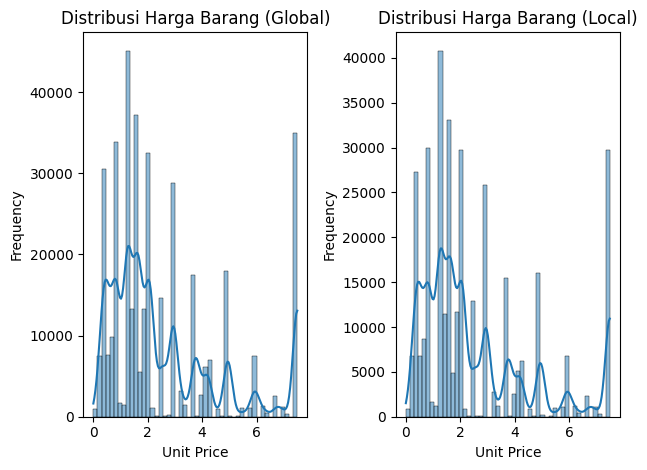

In [ ]:
#Menampilkan grafik distribusi harga
# ---- Grafik kiri: Global ----
plt.subplot(1, 2, 1)   # 1 baris, 2 kolom, grafik ke-1
sns.histplot(df_global['UnitPrice'], bins=50, kde=True)
plt.title("Distribusi Harga Barang (Global)")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")

# ---- Grafik kanan: Local ----
plt.subplot(1, 2, 2)   # 1 baris, 2 kolom, grafik ke-2
sns.histplot(df_local['UnitPrice'], bins=50, kde=True)
plt.title("Distribusi Harga Barang (Local)")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

#### 5.2.2 Menampilkan Harga Barang Tertinggi

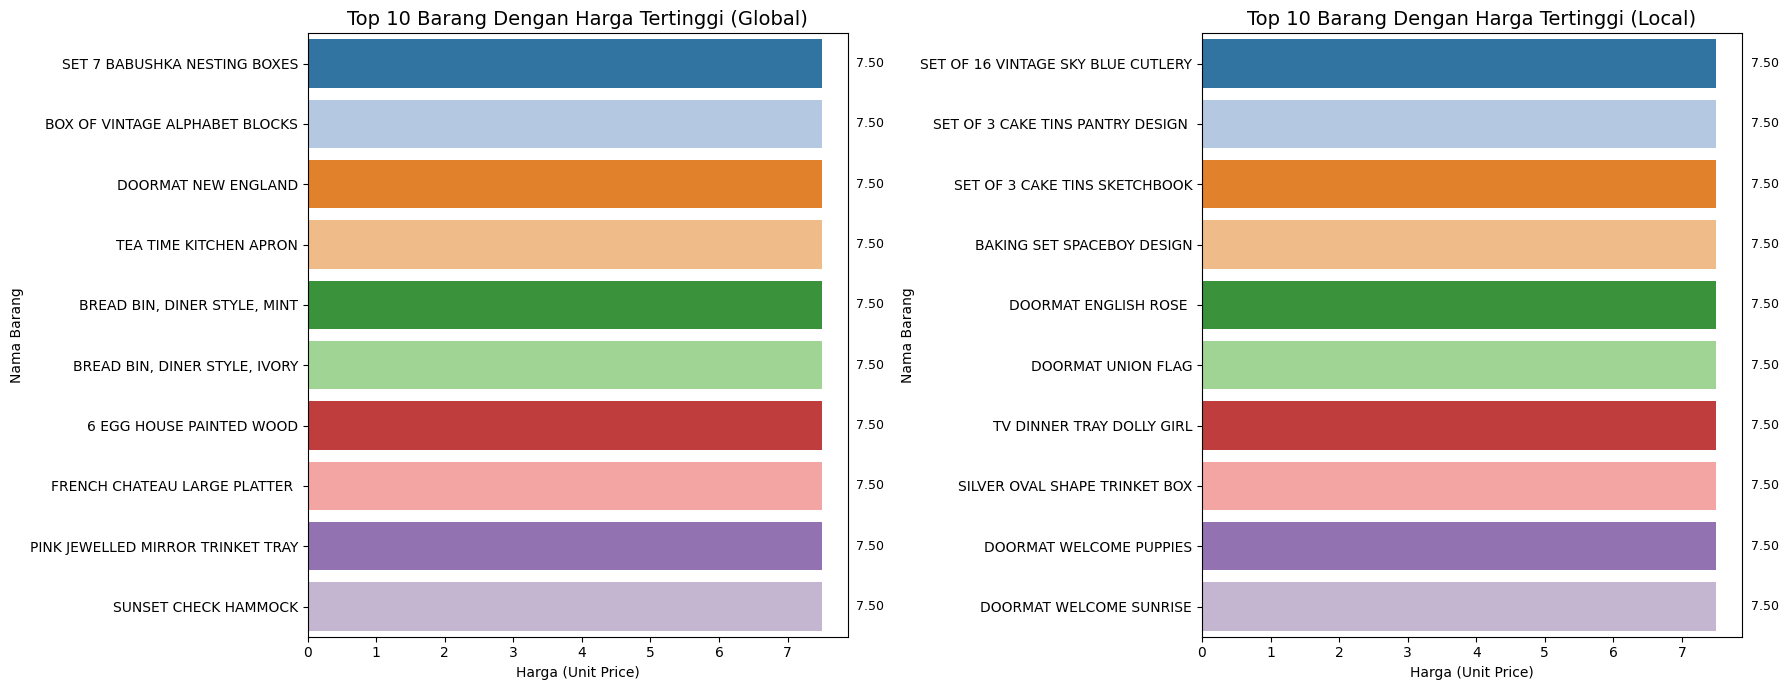

In [ ]:
# Barang dengan harga termahal
# --- Menentukan data dulu ---
top_10_highest_global = df_global[['Description', 'UnitPrice']].drop_duplicates().sort_values(
    by='UnitPrice', ascending=False).head(10)

top_10_highest_local = df_local[['Description', 'UnitPrice']].drop_duplicates().sort_values(
    by='UnitPrice', ascending=False).head(10)

# Membuat color palette berbeda untuk tiap barang
colors_global = sns.color_palette("tab20", len(top_10_highest_global))
colors_local = sns.color_palette("tab20", len(top_10_highest_local))

# --- Plot berdampingan ---
plt.figure(figsize=(18,7))  # diperlebar

# Grafik kiri: Global
plt.subplot(1, 2, 1)
sns.barplot(
    data=top_10_highest_global,
    y='Description', x='UnitPrice',
    hue='Description',              # <--- warna berdasarkan nama barang
    palette=colors_global,
    legend=False                    # <--- legend tidak perlu
)

plt.title("Top 10 Barang Dengan Harga Tertinggi (Global)", fontsize=14)
plt.xlabel("Harga (Unit Price)")
plt.ylabel("Nama Barang")

# Tambahkan angka harga di ujung bar
for i, value in enumerate(top_10_highest_global['UnitPrice']):
    plt.text(value + 0.5, i, f"{value:.2f}", va='center', fontsize=9)

# Grafik kanan: Local
plt.subplot(1, 2, 2)
sns.barplot(
    data=top_10_highest_local,
    y='Description', x='UnitPrice',
    hue='Description',
    palette=colors_local,
    legend=False
)
plt.title("Top 10 Barang Dengan Harga Tertinggi (Local)", fontsize=14)
plt.xlabel("Harga (Unit Price)")
plt.ylabel("Nama Barang")

# Tambahkan angka harga di ujung bar
for i, value in enumerate(top_10_highest_local['UnitPrice']):
    plt.text(value + 0.5, i, f"{value:.2f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()


#### 5.2.3 Menampilkan Harga Barang Terendah

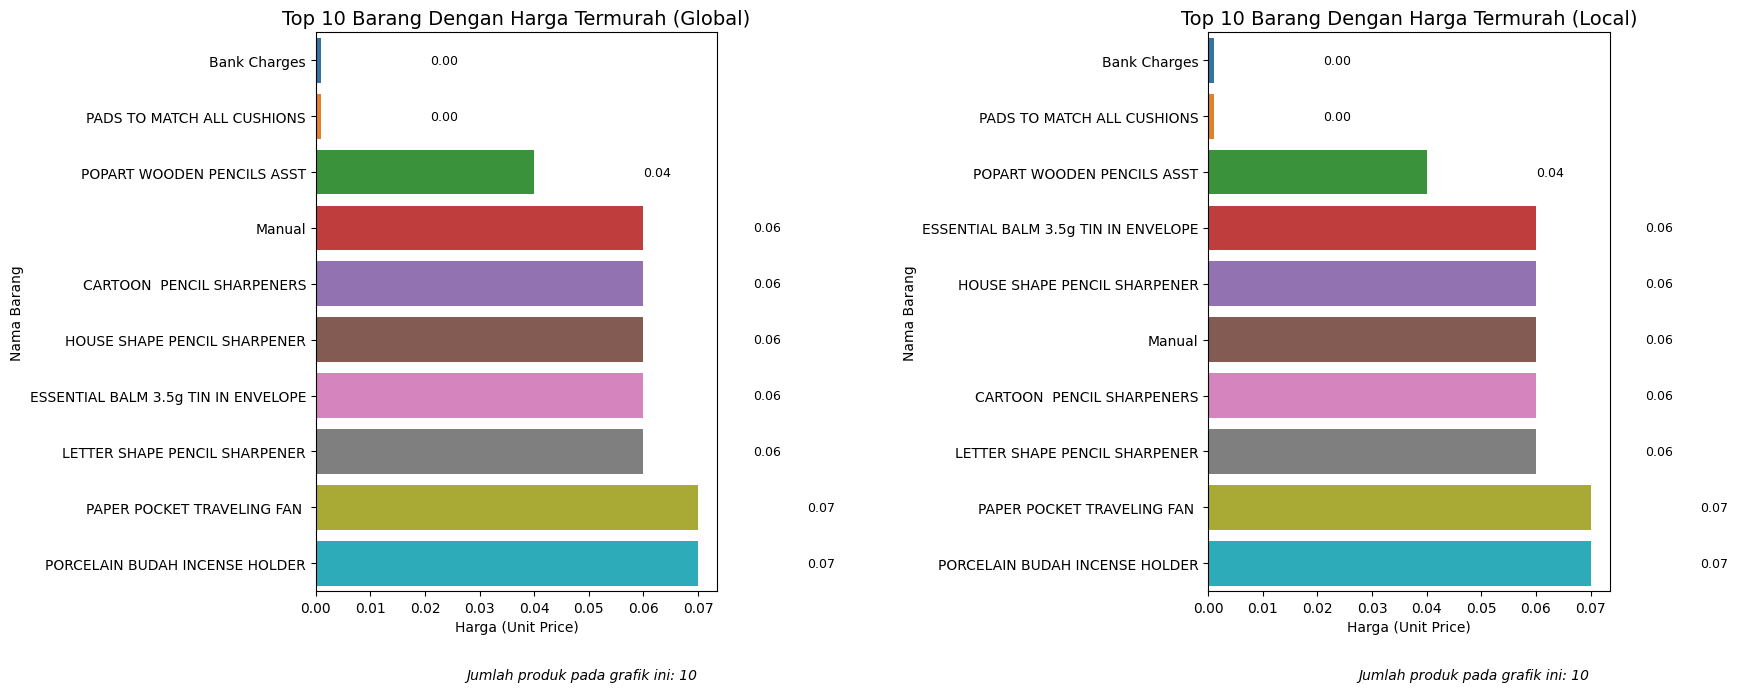

In [ ]:
# Barang dengan harga terendah
# --- Siapkan data barang terendah ---
top_10_lowest_global = df_global[df_global['UnitPrice'] > 0][['Description', 'UnitPrice']] \
    .drop_duplicates().sort_values(by='UnitPrice', ascending=True).head(10)

top_10_lowest_local = df_local[df_local['UnitPrice'] > 0][['Description', 'UnitPrice']] \
    .drop_duplicates().sort_values(by='UnitPrice', ascending=True).head(10)

# Buat warna berbeda untuk setiap barang
colors_global = sns.color_palette("tab10", len(top_10_lowest_global))
colors_local = sns.color_palette("tab10", len(top_10_lowest_local))

# --- Plot berdampingan ---
plt.figure(figsize=(18, 7))

# Grafik kiri: Global
plt.subplot(1, 2, 1)
sns.barplot(
    data=top_10_lowest_global,
    y='Description', x='UnitPrice',
    hue='Description',              # <--- warna berdasarkan nama barang
    palette=colors_global,
    legend=False                    # <--- legend tidak perlu
)
plt.title("Top 10 Barang Dengan Harga Termurah (Global)", fontsize=14)
plt.xlabel("Harga (Unit Price)")
plt.ylabel("Nama Barang")

# Tambahkan label harga di ujung bar
for i, value in enumerate(top_10_lowest_global['UnitPrice']):
    plt.text(value + 0.02, i, f"{value:.2f}", va='center', fontsize=9)

# Tambahkan informasi jumlah produk
plt.text(0.95, -0.15, f"Jumlah produk pada grafik ini: {len(top_10_lowest_global)}",
         ha='right', va='center', transform=plt.gca().transAxes, fontsize=10, style='italic')

# Grafik kanan: Local
plt.subplot(1, 2, 2)
sns.barplot(
    data=top_10_lowest_local,
    y='Description', x='UnitPrice',
    hue='Description',
    palette=colors_local,
    legend=False
)
plt.title("Top 10 Barang Dengan Harga Termurah (Local)", fontsize=14)
plt.xlabel("Harga (Unit Price)")
plt.ylabel("Nama Barang")

# Tambahkan label harga di ujung bar
for i, value in enumerate(top_10_lowest_local['UnitPrice']):
    plt.text(value + 0.02, i, f"{value:.2f}", va='center', fontsize=9)

# Tambahkan informasi jumlah produk
plt.text(0.95, -0.15, f"Jumlah produk pada grafik ini: {len(top_10_lowest_local)}",
         ha='right', va='center', transform=plt.gca().transAxes, fontsize=10, style='italic')

plt.tight_layout()
plt.show()


### 5.3 Insight Barang

#### 5.3.1 Barang Paling Diminati

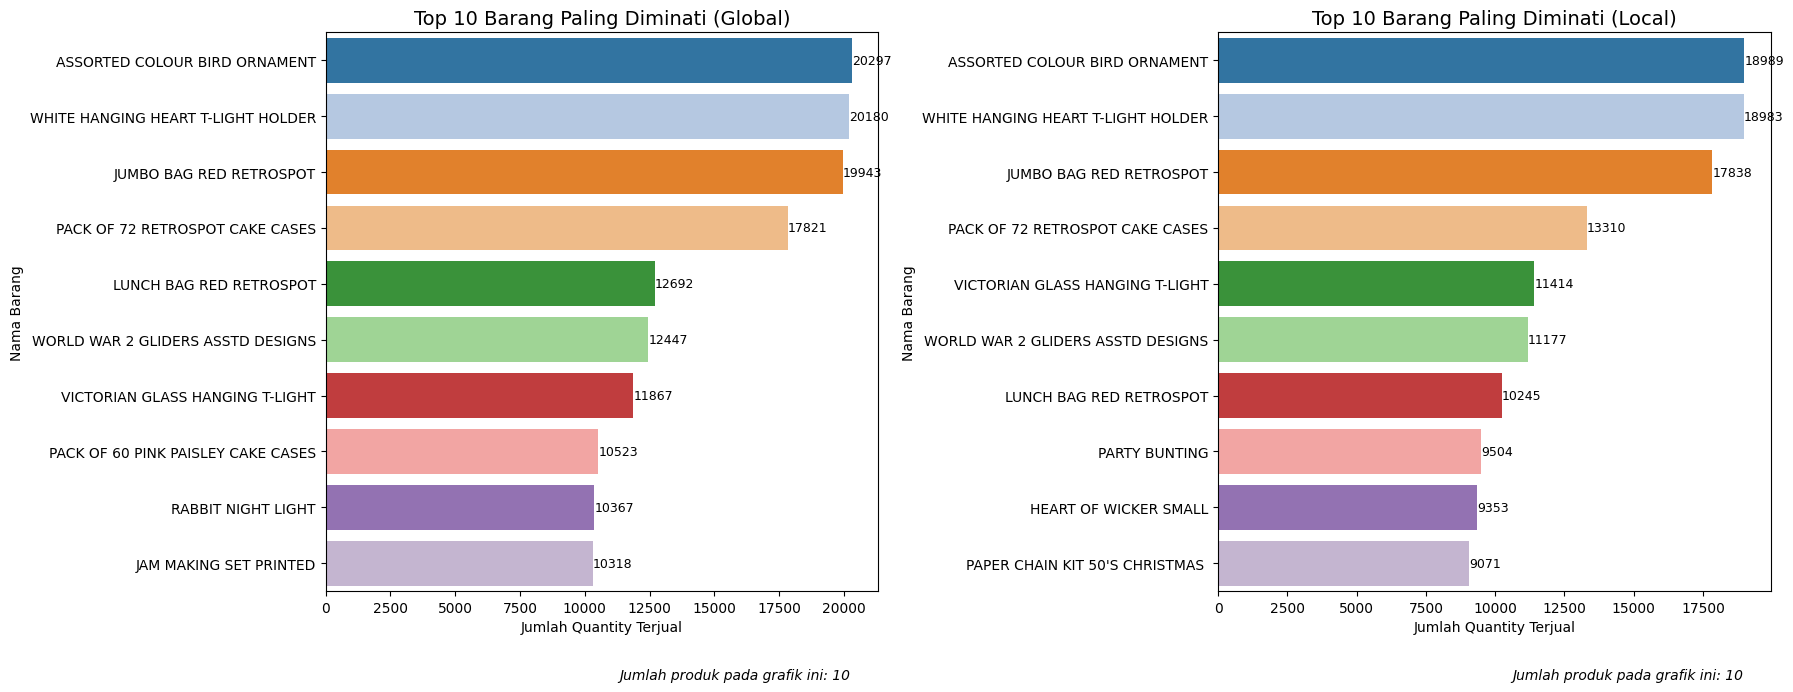

In [ ]:
# --- Data barang yang paling diminati ---
top_products_global = df_global.groupby('Description', as_index=False)['Quantity'].sum() \
                               .sort_values(by='Quantity', ascending=False).head(10)

top_products_local = df_local.groupby('Description', as_index=False)['Quantity'].sum() \
                             .sort_values(by='Quantity', ascending=False).head(10)

# Palet warna berbeda untuk tiap barang
colors_global = sns.color_palette("tab20", len(top_products_global))
colors_local = sns.color_palette("tab20", len(top_products_local))

# --- Visualisasi berdampingan ---
plt.figure(figsize=(18, 7))

# Grafik kiri: Global
plt.subplot(1, 2, 1)
sns.barplot(
    data=top_products_global,
    y='Description', x='Quantity',
    hue='Description', palette=colors_global, legend=False  # <–– warna tiap barang, tanpa warning
)
plt.title("Top 10 Barang Paling Diminati (Global)", fontsize=14)
plt.xlabel("Jumlah Quantity Terjual")
plt.ylabel("Nama Barang")

# Tambahkan angka quantity di ujung bar
for i, qty in enumerate(top_products_global['Quantity']):
    plt.text(qty + 0.5, i, f"{qty}", va='center', fontsize=9)

# Tambahkan informasi jumlah produk
plt.text(
    0.95, -0.15,
    f"Jumlah produk pada grafik ini: {len(top_products_global)}",
    ha='right', va='center', transform=plt.gca().transAxes, fontsize=10, style='italic'
)

# Grafik kanan: Local
plt.subplot(1, 2, 2)
sns.barplot(
    data=top_products_local,
    y='Description', x='Quantity',
    hue='Description', palette=colors_local, legend=False
)
plt.title("Top 10 Barang Paling Diminati (Local)", fontsize=14)
plt.xlabel("Jumlah Quantity Terjual")
plt.ylabel("Nama Barang")

# Tambahkan angka quantity di ujung bar
for i, qty in enumerate(top_products_local['Quantity']):
    plt.text(qty + 0.5, i, f"{qty}", va='center', fontsize=9)

# Tambahkan informasi jumlah produk
plt.text(
    0.95, -0.15,
    f"Jumlah produk pada grafik ini: {len(top_products_local)}",
    ha='right', va='center', transform=plt.gca().transAxes, fontsize=10, style='italic'
)

plt.tight_layout()
plt.show()


#### 5.3.2 Barang Kurang Diminati

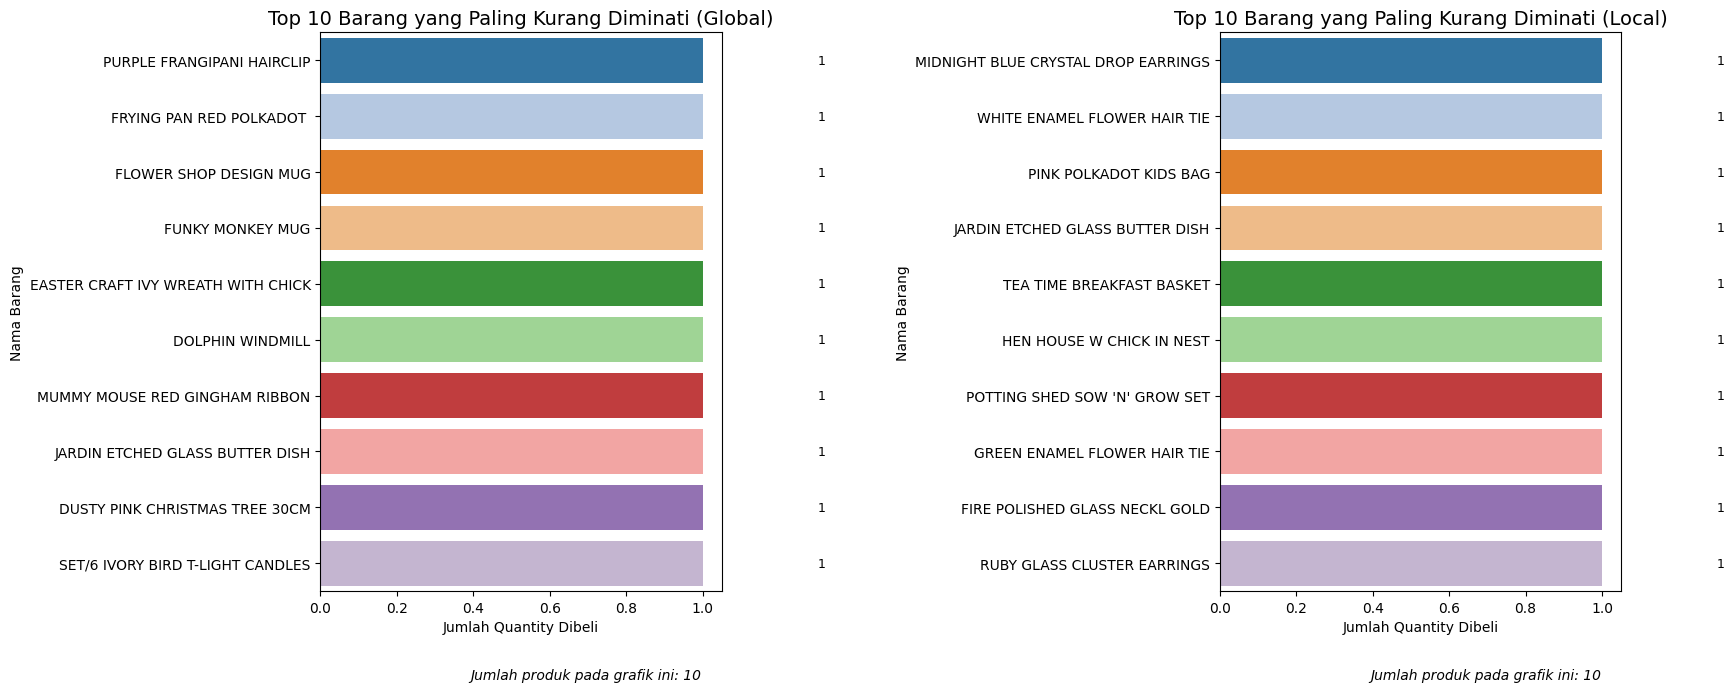

In [ ]:
# --- Data barang yang paling kurang diminati ---
least_products_global = df_global[df_global['Quantity'] > 0].groupby('Description', as_index=False)['Quantity'].sum() \
                                      .sort_values(by='Quantity', ascending=True).head(10)

least_products_local = df_local[df_local['Quantity'] > 0].groupby('Description', as_index=False)['Quantity'].sum() \
                                    .sort_values(by='Quantity', ascending=True).head(10)

# Buat warna berbeda untuk setiap barang
colors_global = sns.color_palette("tab20", len(least_products_global))
colors_local = sns.color_palette("tab20", len(least_products_local))

# --- Visualisasi berdampingan ---
plt.figure(figsize=(18, 7))

# Grafik kiri: Global
plt.subplot(1, 2, 1)
sns.barplot(
    data=least_products_global,
    y='Description', x='Quantity',
    hue='Description', palette=colors_global, legend=False
)
plt.title("Top 10 Barang yang Paling Kurang Diminati (Global)", fontsize=14)
plt.xlabel("Jumlah Quantity Dibeli")
plt.ylabel("Nama Barang")

# Tambahkan angka quantity di ujung bar
for i, qty in enumerate(least_products_global['Quantity']):
    plt.text(qty + 0.3, i, f"{qty}", va='center', fontsize=9)

# Tambahkan informasi jumlah produk
plt.text(
    0.95, -0.15,
    f"Jumlah produk pada grafik ini: {len(least_products_global)}",
    ha='right', va='center', transform=plt.gca().transAxes, fontsize=10, style='italic'
)

# Grafik kanan: Local
plt.subplot(1, 2, 2)
sns.barplot(
    data=least_products_local,
    y='Description', x='Quantity',
    hue='Description', palette=colors_local, legend=False
)
plt.title("Top 10 Barang yang Paling Kurang Diminati (Local)", fontsize=14)
plt.xlabel("Jumlah Quantity Dibeli")
plt.ylabel("Nama Barang")

# Tambahkan angka quantity di ujung bar
for i, qty in enumerate(least_products_local['Quantity']):
    plt.text(qty + 0.3, i, f"{qty}", va='center', fontsize=9)

# Tambahkan informasi jumlah produk
plt.text(
    0.95, -0.15,
    f"Jumlah produk pada grafik ini: {len(least_products_local)}",
    ha='right', va='center', transform=plt.gca().transAxes, fontsize=10, style='italic'
)

plt.tight_layout()
plt.show()


#### 5.3.3 Hubungan Antara Banyak Barang dengan Harga Barang

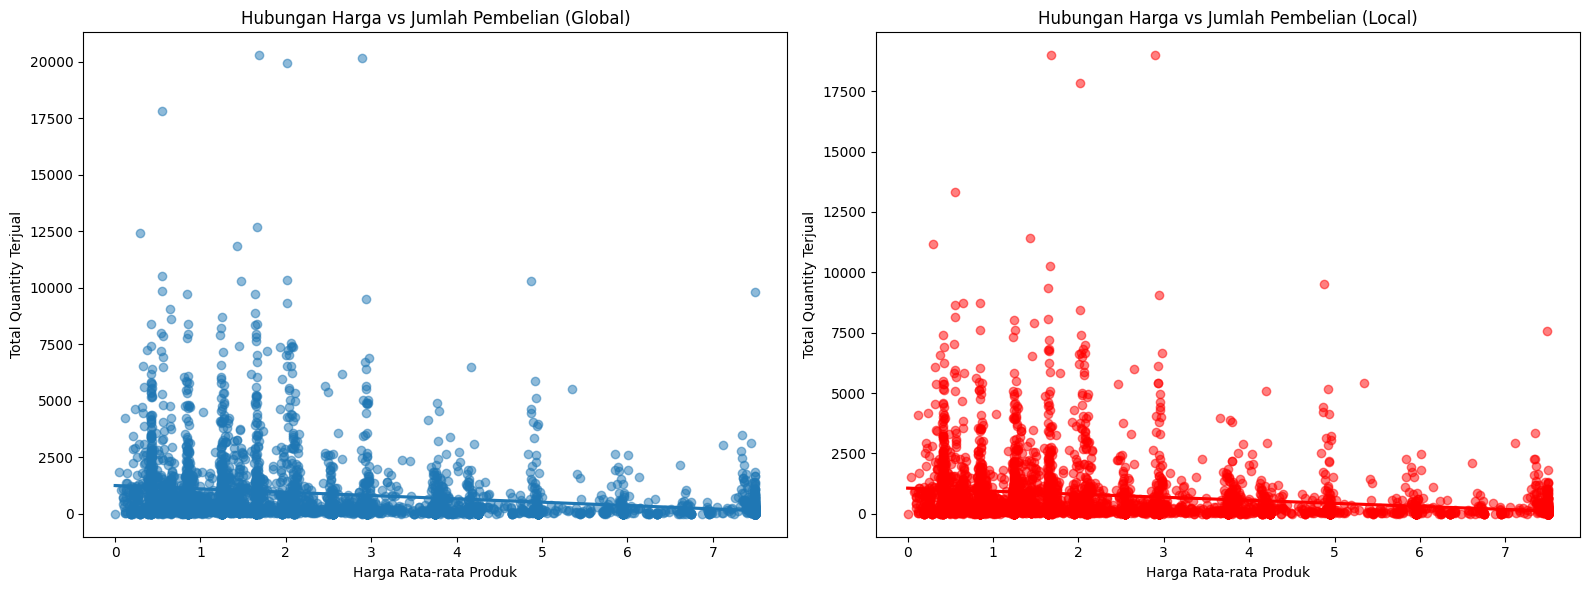

In [ ]:
# --- Mengelompokkan harga rata-rata per produk & total quantity per produk ---
price_quantity_global = df_global.groupby('Description', as_index=False).agg({
    'UnitPrice': 'mean',
    'Quantity': 'sum'
})
price_quantity_local = df_local.groupby('Description', as_index=False).agg({
    'UnitPrice': 'mean',
    'Quantity': 'sum'
})

# --- Visualisasi hubungan harga vs jumlah pembelian ---
plt.figure(figsize=(16,6))

# Grafik Global
plt.subplot(1, 2, 1)
sns.regplot(data=price_quantity_global, x='UnitPrice', y='Quantity', scatter_kws={'alpha':0.5})
plt.title("Hubungan Harga vs Jumlah Pembelian (Global)")
plt.xlabel("Harga Rata-rata Produk")
plt.ylabel("Total Quantity Terjual")

# Grafik Local
plt.subplot(1, 2, 2)
sns.regplot(data=price_quantity_local, x='UnitPrice', y='Quantity', scatter_kws={'alpha':0.5}, color='red')
plt.title("Hubungan Harga vs Jumlah Pembelian (Local)")
plt.xlabel("Harga Rata-rata Produk")
plt.ylabel("Total Quantity Terjual")

plt.tight_layout()
plt.show()


### 5.4 Insight Pelanggan

#### 5.4.1 Pelanggan Paling Sering Melakukan Transaksi

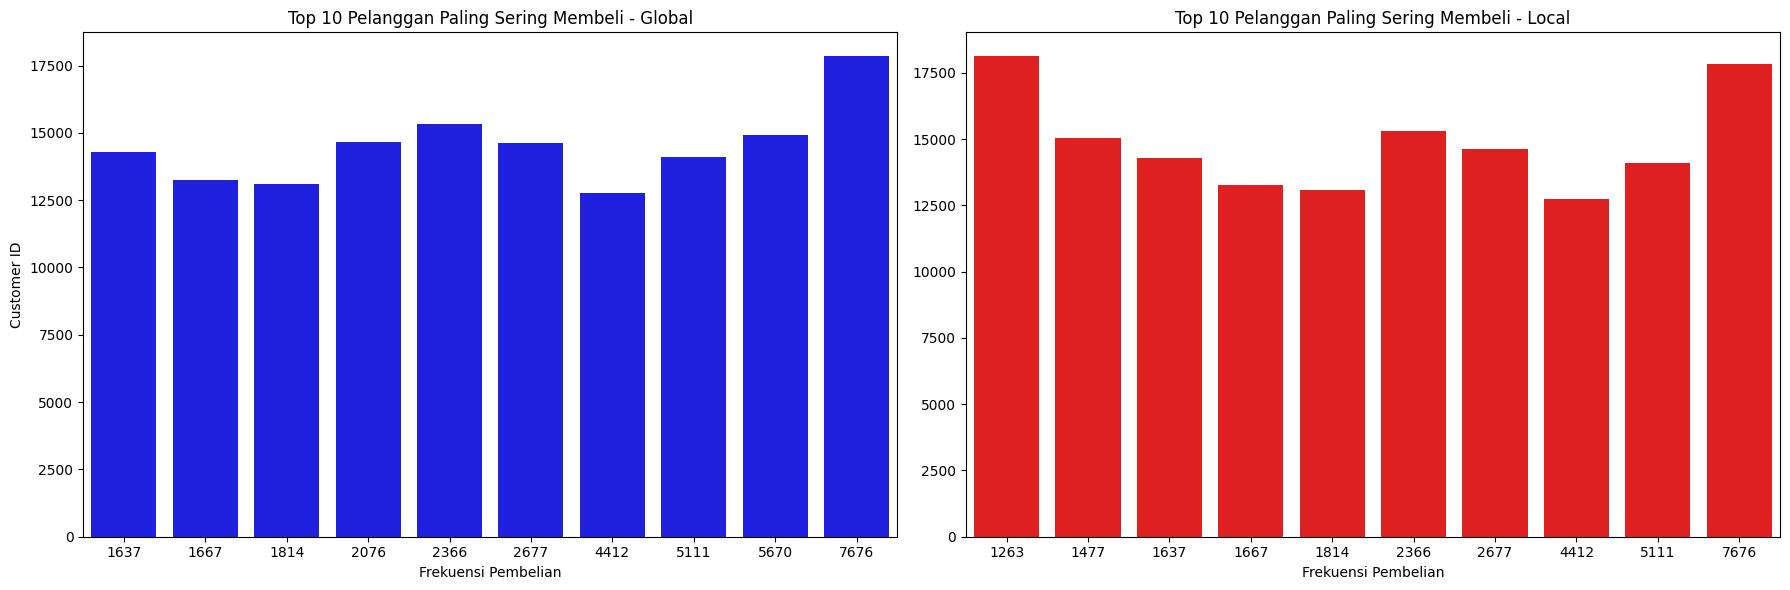

In [ ]:
# Menghitung frekuensi pembelian pelanggan (jumlah transaksi per CustomerID)
freq_global = df_global.groupby('CustomerID', as_index=False)['InvoiceNo'].count()
freq_global.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

freq_local = df_local.groupby('CustomerID', as_index=False)['InvoiceNo'].count()
freq_local.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

# Pelanggan paling sering membeli (Top 10)
top_customers_global = freq_global.sort_values(by='Frequency', ascending=False).head(10)
top_customers_local = freq_local.sort_values(by='Frequency', ascending=False).head(10)

# Pelanggan jarang membeli (Bottom 10)
least_customers_global = freq_global.sort_values(by='Frequency', ascending=True).head(10)
least_customers_local = freq_local.sort_values(by='Frequency', ascending=True).head(10)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(data=top_customers_global, y='CustomerID', x='Frequency', color='blue', ax=axes[0])
axes[0].set_title("Top 10 Pelanggan Paling Sering Membeli - Global")
axes[0].set_xlabel("Frekuensi Pembelian")
axes[0].set_ylabel("Customer ID")

sns.barplot(data=top_customers_local, y='CustomerID', x='Frequency', color='red', ax=axes[1])
axes[1].set_title("Top 10 Pelanggan Paling Sering Membeli - Local")
axes[1].set_xlabel("Frekuensi Pembelian")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()



#### 5.4.2 Pelanggan Jarang Melakukan Transaksi

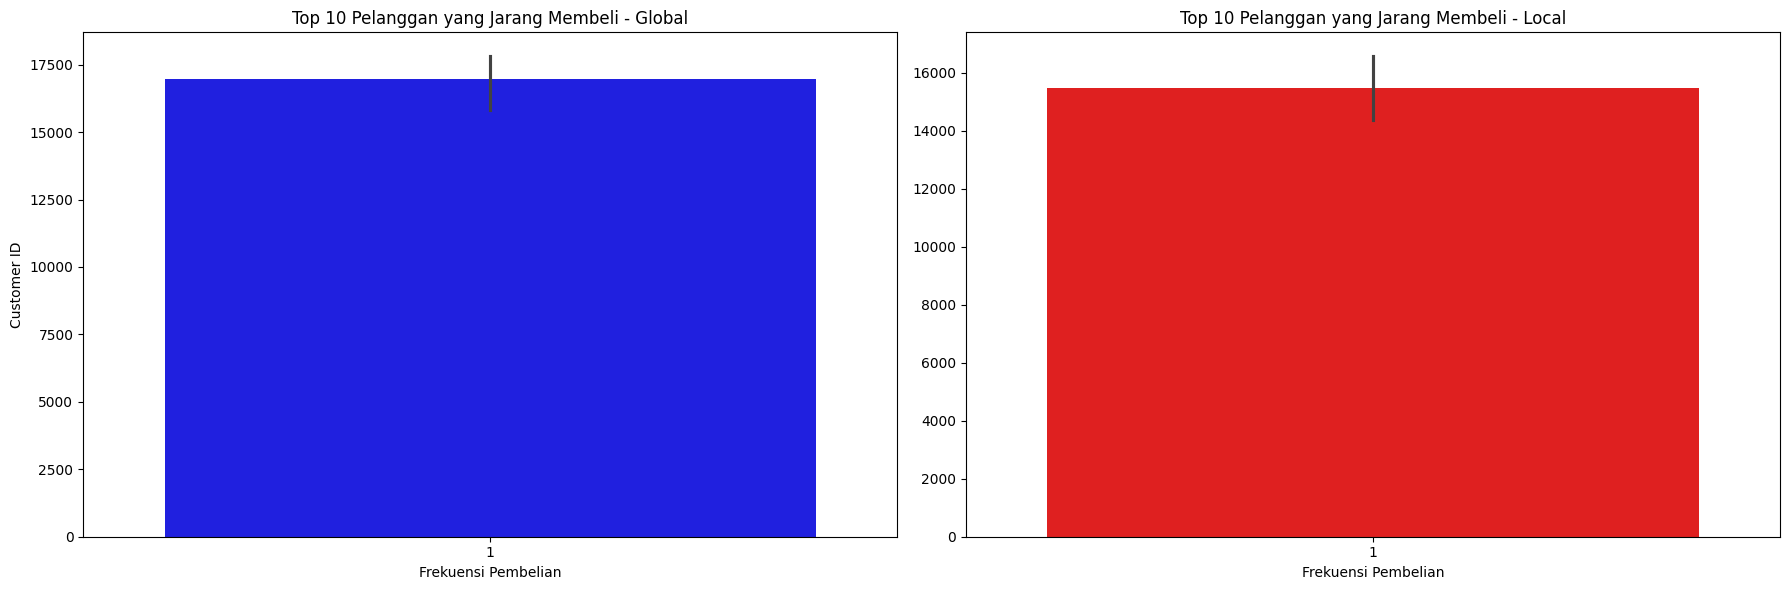

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Global (warna biru)
sns.barplot(data=least_customers_global, y='CustomerID', x='Frequency', color='blue', ax=axes[0])
axes[0].set_title("Top 10 Pelanggan yang Jarang Membeli - Global")
axes[0].set_xlabel("Frekuensi Pembelian")
axes[0].set_ylabel("Customer ID")

# Local (warna merah)
sns.barplot(data=least_customers_local, y='CustomerID', x='Frequency', color='red', ax=axes[1])
axes[1].set_title("Top 10 Pelanggan yang Jarang Membeli - Local")
axes[1].set_xlabel("Frekuensi Pembelian")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


### 5.4.3 Banyak Pelanggan

In [ ]:
freq_global.head(10)

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
5,12352.0,85
6,12353.0,4
7,12354.0,58
8,12355.0,13
9,12356.0,59


In [ ]:
jumlah_pengunjung_global = df_global['CustomerID'].nunique()
print(jumlah_pengunjung_global)

4338


In [ ]:
freq_local.head(10)

,CustomerID,Frequency
0,12346.0,1
1,12747.0,103
2,12748.0,4412
3,12749.0,199
4,12820.0,59
5,12821.0,6
6,12822.0,46
7,12823.0,5
8,12824.0,25
9,12826.0,91


In [ ]:
jumlah_pengunjung_local = df_local['CustomerID'].nunique()
print(jumlah_pengunjung_local)

3920


### 5.5 Insight Trend Penjualan dari Waktu ke Waktu

#### 5.5.1 Total Penjualan dalam Tiap Bulan

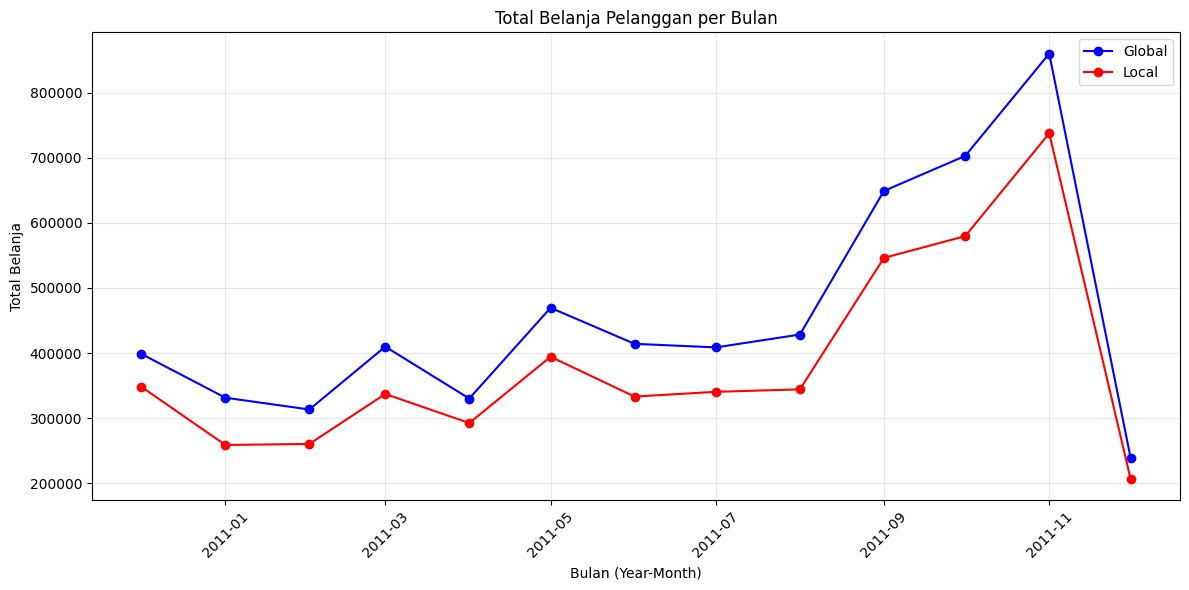

In [ ]:
# Membuat kolom total belanja
df_global['TotalAmount'] = df_global['Quantity'] * df_global['UnitPrice']
df_local['TotalAmount'] = df_local['Quantity'] * df_local['UnitPrice']

# Membuat kolom bulan (format YYYY-MM)
df_global['Month'] = df_global['InvoiceDate'].dt.to_period('M').astype(str)
df_local['Month'] = df_local['InvoiceDate'].dt.to_period('M').astype(str)

# Hitung total belanja tiap bulan
monthly_spend_global = df_global.groupby('Month', as_index=False)['TotalAmount'].sum()
monthly_spend_local = df_local.groupby('Month', as_index=False)['TotalAmount'].sum()

# Convert 'Month' column to datetime objects AFTER creating the dataframes
monthly_spend_global['Month'] = pd.to_datetime(monthly_spend_global['Month'])
monthly_spend_local['Month'] = pd.to_datetime(monthly_spend_local['Month'])

plt.figure(figsize=(12,6))

plt.plot(monthly_spend_global['Month'], monthly_spend_global['TotalAmount'],
         marker='o', label='Global', color='blue')

plt.plot(monthly_spend_local['Month'], monthly_spend_local['TotalAmount'],
         marker='o', label='Local', color='red')

plt.title("Total Belanja Pelanggan per Bulan")
plt.xlabel("Bulan (Year-Month)")
plt.ylabel("Total Belanja")
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### 5.5.2 Jumlah Pelanggan dalam Tiap Bulan

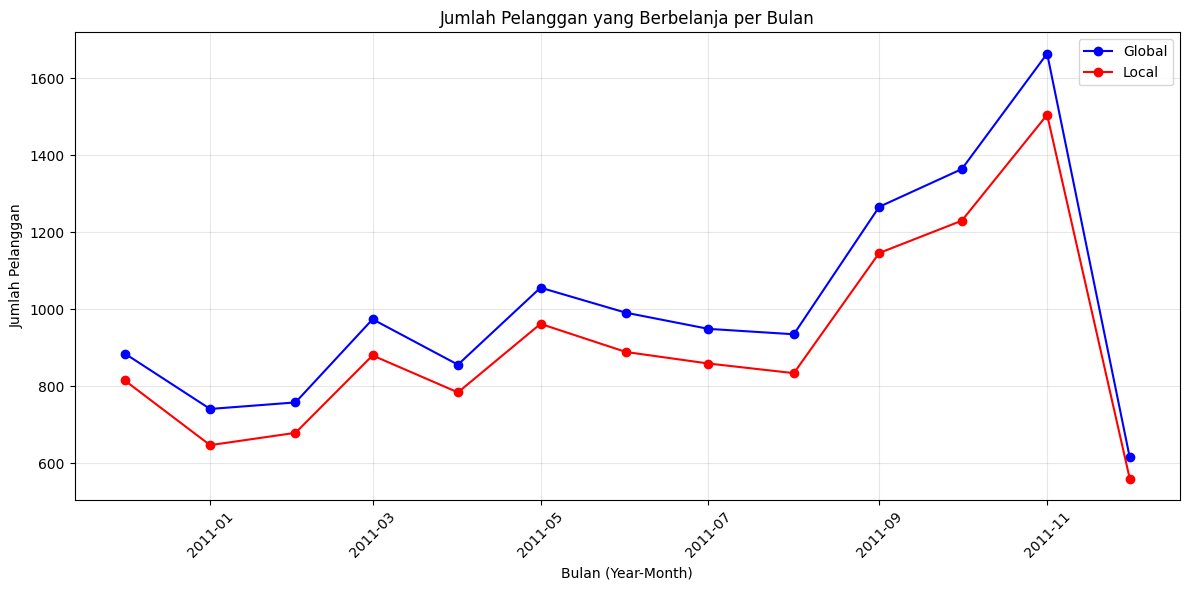

In [ ]:
# Membuat kolom bulan (jika belum ada)
df_global['Month'] = df_global['InvoiceDate'].dt.to_period('M').astype(str)
df_local['Month'] = df_local['InvoiceDate'].dt.to_period('M').astype(str)

# Menghitung jumlah pelanggan unik tiap bulan
cust_month_global = df_global.groupby('Month')['CustomerID'].nunique().reset_index()
cust_month_global.rename(columns={'CustomerID': 'CustomerCount'}, inplace=True)

cust_month_local = df_local.groupby('Month')['CustomerID'].nunique().reset_index()
cust_month_local.rename(columns={'CustomerID': 'CustomerCount'}, inplace=True)

# Convert ke datetime agar grafik berurutan
cust_month_global['Month'] = pd.to_datetime(cust_month_global['Month'])
cust_month_local['Month'] = pd.to_datetime(cust_month_local['Month'])

# Sorting
cust_month_global = cust_month_global.sort_values('Month')
cust_month_local = cust_month_local.sort_values('Month')

plt.figure(figsize=(12,6))

plt.plot(cust_month_global['Month'], cust_month_global['CustomerCount'],
         marker='o', label='Global', color='blue')

plt.plot(cust_month_local['Month'], cust_month_local['CustomerCount'],
         marker='o', label='Local', color='red')

plt.title("Jumlah Pelanggan yang Berbelanja per Bulan")
plt.xlabel("Bulan (Year-Month)")
plt.ylabel("Jumlah Pelanggan")
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



#### 5.5.3 Jam Pembelian Terbanyak

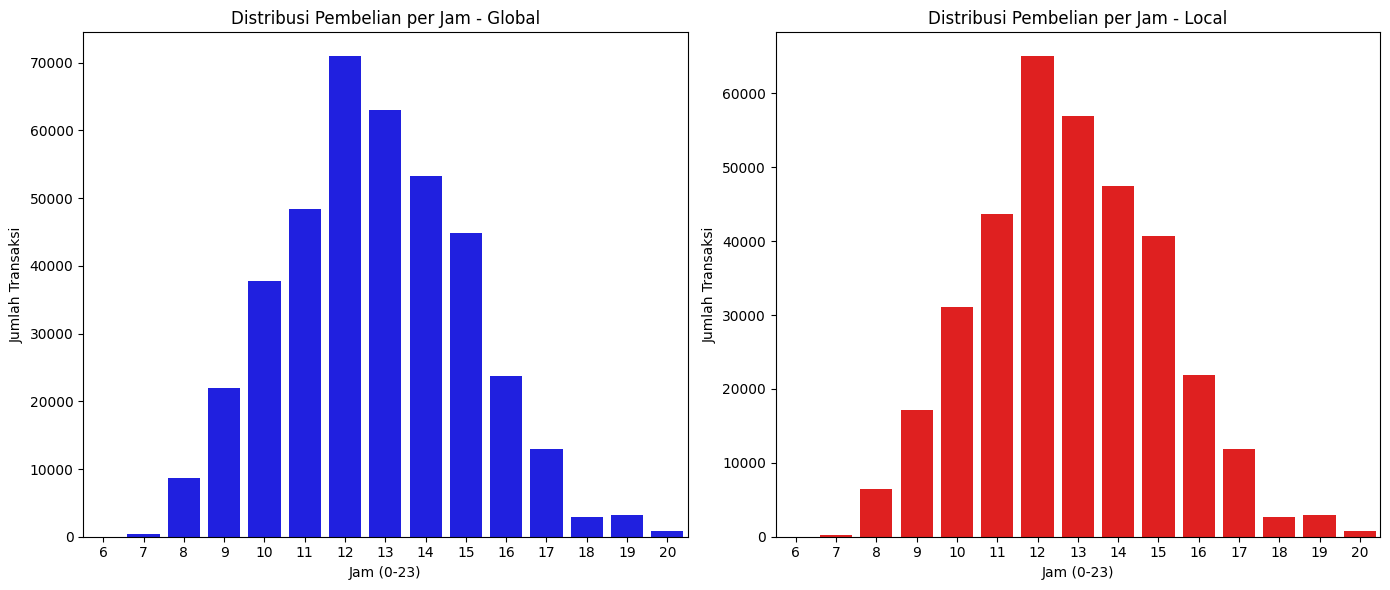

In [ ]:
# Membuat kolom jam (0–23)
df_global['Hour'] = df_global['InvoiceDate'].dt.hour
df_local['Hour'] = df_local['InvoiceDate'].dt.hour

transactions_hour_global = df_global.groupby('Hour', as_index=False)['InvoiceNo'].count()
transactions_hour_global.rename(columns={'InvoiceNo': 'TotalTransactions'}, inplace=True)

transactions_hour_local = df_local.groupby('Hour', as_index=False)['InvoiceNo'].count()
transactions_hour_local.rename(columns={'InvoiceNo': 'TotalTransactions'}, inplace=True)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.barplot(data=transactions_hour_global, x='Hour', y='TotalTransactions', color='blue')
plt.title("Distribusi Pembelian per Jam - Global")
plt.xlabel("Jam (0-23)")
plt.ylabel("Jumlah Transaksi")

plt.subplot(1,2,2)
sns.barplot(data=transactions_hour_local, x='Hour', y='TotalTransactions', color='red')
plt.title("Distribusi Pembelian per Jam - Local")
plt.xlabel("Jam (0-23)")
plt.ylabel("Jumlah Transaksi")

plt.tight_layout()
plt.show()


#### 5.5.4 Hari Pembelian Terbanyak

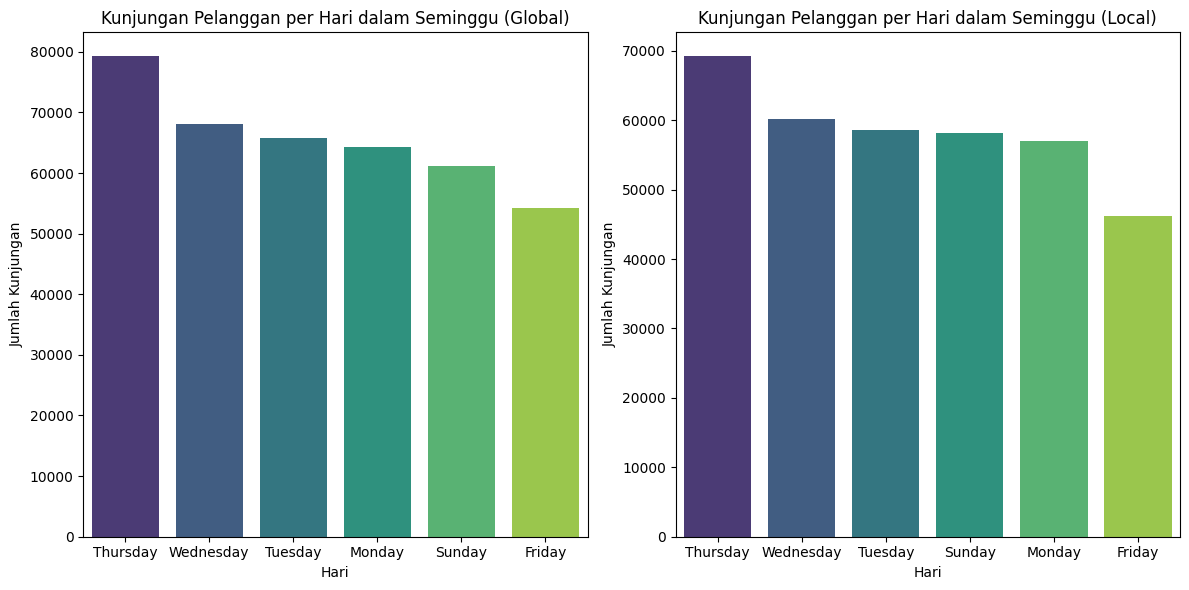

In [ ]:
df_global['DayOfWeek'] = df_global['InvoiceDate'].dt.day_name()
df_local['DayOfWeek'] = df_local['InvoiceDate'].dt.day_name()

visits_per_day_global = df_global['DayOfWeek'].value_counts()
most_visited_day_global = visits_per_day_global.idxmax()
max_visits = visits_per_day_global.max()

visits_per_day_local = df_local['DayOfWeek'].value_counts()
most_visited_day_local = visits_per_day_local.idxmax()
max_visits_local = visits_per_day_local.max()

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.barplot(x=visits_per_day_global.index, y=visits_per_day_global.values, hue=visits_per_day_global.index, palette='viridis', legend=False)
plt.title('Kunjungan Pelanggan per Hari dalam Seminggu (Global)')
plt.xlabel('Hari')
plt.ylabel('Jumlah Kunjungan')

plt.subplot(1,2,2)
sns.barplot(x=visits_per_day_local.index, y=visits_per_day_local.values, hue=visits_per_day_global.index, palette='viridis', legend=False)
plt.title('Kunjungan Pelanggan per Hari dalam Seminggu (Local)')
plt.xlabel('Hari')
plt.ylabel('Jumlah Kunjungan')

plt.tight_layout()
plt.show()


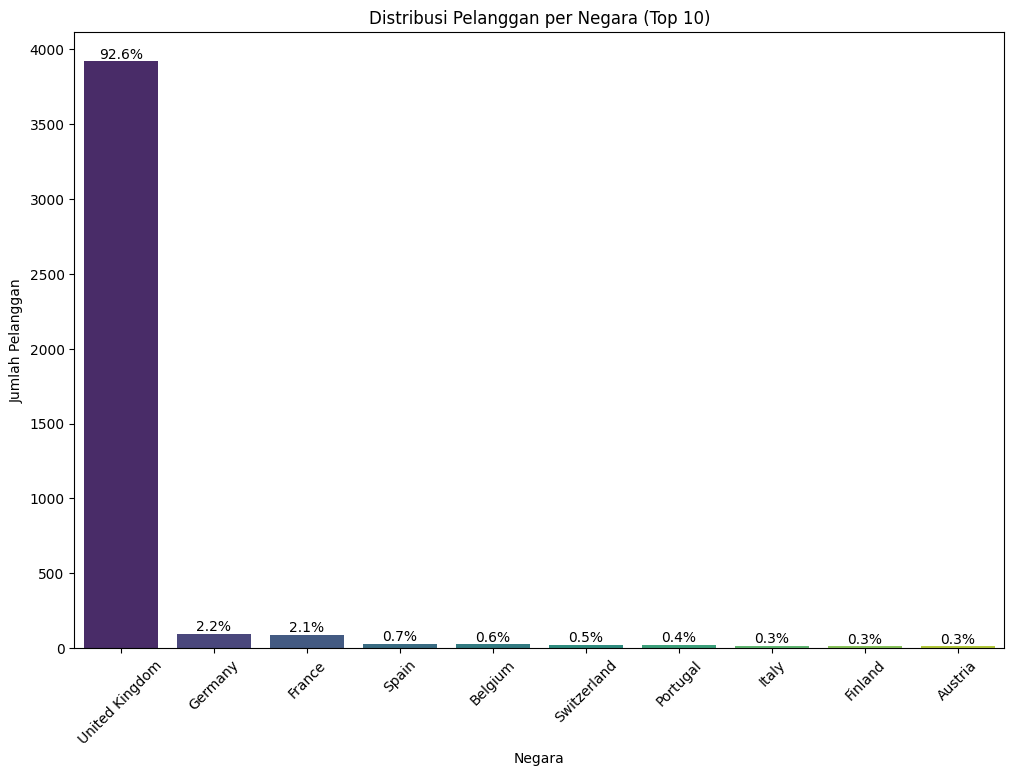

In [ ]:
customers_per_country = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)

top_countries = customers_per_country.head(10)
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x=top_countries.index, y=top_countries.values, hue=top_countries.index, palette='viridis', legend=False)
plt.title('Distribusi Pelanggan per Negara (Top 10)')
plt.xlabel('Negara')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
# Tambahkan label persentase di atas batang (hitung persentase relatif terhadap total top 10)
total_top = top_countries.sum()
for p in bar_plot.patches:
    height = p.get_height()
    percentage = (height / total_top) * 100
    bar_plot.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom', fontsize=10, color='black')

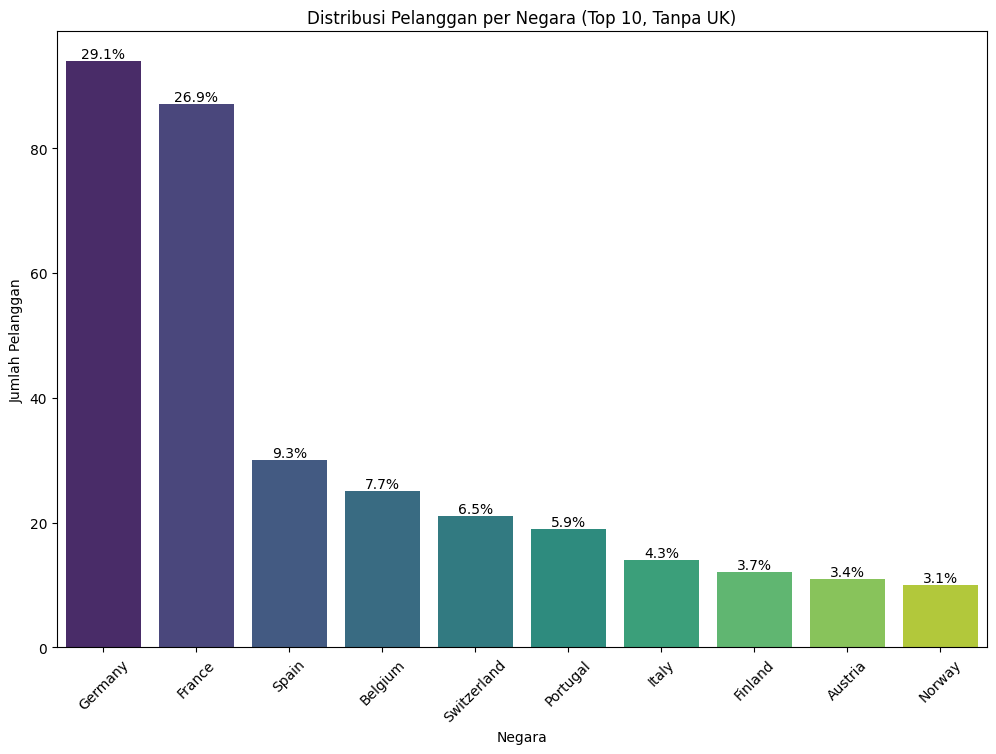

In [ ]:
df_filtered = df[df['Country'] != 'United Kingdom']
customers_per_country = df_filtered.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
top_countries = customers_per_country.head(10)
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x=top_countries.index, y=top_countries.values, hue=top_countries.index, palette='viridis', legend=False)
plt.title('Distribusi Pelanggan per Negara (Top 10, Tanpa UK)')
plt.xlabel('Negara')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
# Tambahkan label persentase di atas batang (hitung persentase relatif terhadap total top 10)
total_top = top_countries.sum()
for p in bar_plot.patches:
    height = p.get_height()
    percentage = (height / total_top) * 100
    bar_plot.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom', fontsize=10, color='black')
plt.show()

## 6. Model RFM

##### Analisis RFM (Recency, Frequency, Monetary) adalah metode segmentasi pelanggan yang digunakan untuk memahami nilai dan perilaku pelanggan berdasarkan aktivitas pembelian mereka. RFM membantu mengidentifikasi pelanggan paling berharga, pelanggan baru, hingga pelanggan yang mulai tidak aktif.

--> Recency (R) — Seberapa baru pelanggan melakukan transaksi terakhir.
Pelanggan yang baru berbelanja cenderung memiliki minat lebih tinggi.

--> Frequency (F) — Seberapa sering pelanggan melakukan transaksi.
Pelanggan yang sering membeli menunjukkan loyalitas yang kuat.

--> Monetary (M) — Seberapa besar total uang yang dibelanjakan pelanggan.
Pelanggan yang menghabiskan banyak uang memberikan nilai finansial besar bagi bisnis.

Dengan memberi skor pada setiap R, F, dan M kemudian menggabungkannya, dapat dilakukan pengelompokkan pelanggan menjadi segmen

In [ ]:
# menentukan tanggal acuan (snapshot date) pada perhitungan Recency dalam analisis RFM.
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

### 6.1 RFM Data Global

#### 6.1.1 Menghitung Nilai RFM Data Global

In [ ]:
# Menghitung nilai RFM
rfm_global = df_global.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda date: (snapshot_date - date.max()).days),
    Frequency=('InvoiceNo', 'nunique'),
    Monetary=('TotalPrice', 'sum')
)

rfm_global.columns = ['Recency', 'Frequency', 'Monetary']

rfm_global = rfm_global.reset_index()

rfm_global.head(10)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,42.075
1,12347.0,2,7,3763.670
2,12348.0,75,4,1106.540
3,12349.0,19,1,1439.875
4,12350.0,310,1,334.400
5,12352.0,36,8,1716.115
6,12353.0,204,1,89.000
7,12354.0,232,1,1055.390
8,12355.0,214,1,348.550
9,12356.0,23,3,1802.880


#### 6.1.2 Mengubah Nilai RFM Menjadi Skor RFM (R-Score, F-Score, M-Score) dengan skala 1–5

In [ ]:
# Recency: makin kecil makin bagus → score tinggi
rfm_global['R_Score'] = pd.qcut(rfm_global['Recency'], 5, labels=[5,4,3,2,1]).astype(int)

# Frequency: makin besar makin bagus
rfm_global['F_Score'] = pd.qcut(rfm_global['Frequency'].rank(method="first"), 5, labels=[1,2,3,4,5]).astype(int)

# Monetary: makin besar makin bagus
rfm_global['M_Score'] = pd.qcut(rfm_global['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)


#### 6.1.3 Mengelompokkan Pelanggan (Customer Segmentation) Berdasarkan Perilaku

In [ ]:
rfm_global['RFM_Score'] = rfm_global[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

rfm_global['RFM_Score_Str'] = (
    rfm_global['R_Score'].astype(str) +
    rfm_global['F_Score'].astype(str) +
    rfm_global['M_Score'].astype(str)
)

In [ ]:
def segment_customer(row):

    # 1″ NEW CUSTOMER → Recency tinggi (baru belanja), Frequency dan Monetary masih rendah
    if row['R_Score'] >= 4 and row['F_Score'] <= 2 and row['M_Score'] <= 2:
        return 'New Customer'

    # 2″ LOYAL → Belanja sering
    if row['F_Score'] >= 4 and row['M_Score'] >= 3:
        return 'Loyalty'

    # 3″ BIG SPENDER → Belanja besar (Monetary tinggi), meskipun tidak sering
    if row['M_Score'] >= 4 and row['F_Score'] >= 2:
        return 'Big Spenders'

    # 4″ AT RISK → Sudah lama tidak belanja (Recency rendah)
    if row['R_Score'] <= 2 and row['F_Score'] >= 2:
        return 'At Risk'

    # Default fallback
    return 'Need Attention'

# Terapkan ke RFM
rfm_global['Segment'] = rfm_global.apply(segment_customer, axis=1)

rfm_global.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Score_Str,Segment
0,12346.0,326,1,42.075,1,1,1,3,111,Need Attention
1,12347.0,2,7,3763.670,5,5,5,15,555,Loyalty
2,12348.0,75,4,1106.540,2,4,4,10,244,Loyalty
3,12349.0,19,1,1439.875,4,1,4,9,414,Need Attention
4,12350.0,310,1,334.400,1,1,2,4,112,Need Attention


#### 6.1.4 Visualisasi RFM Data Global

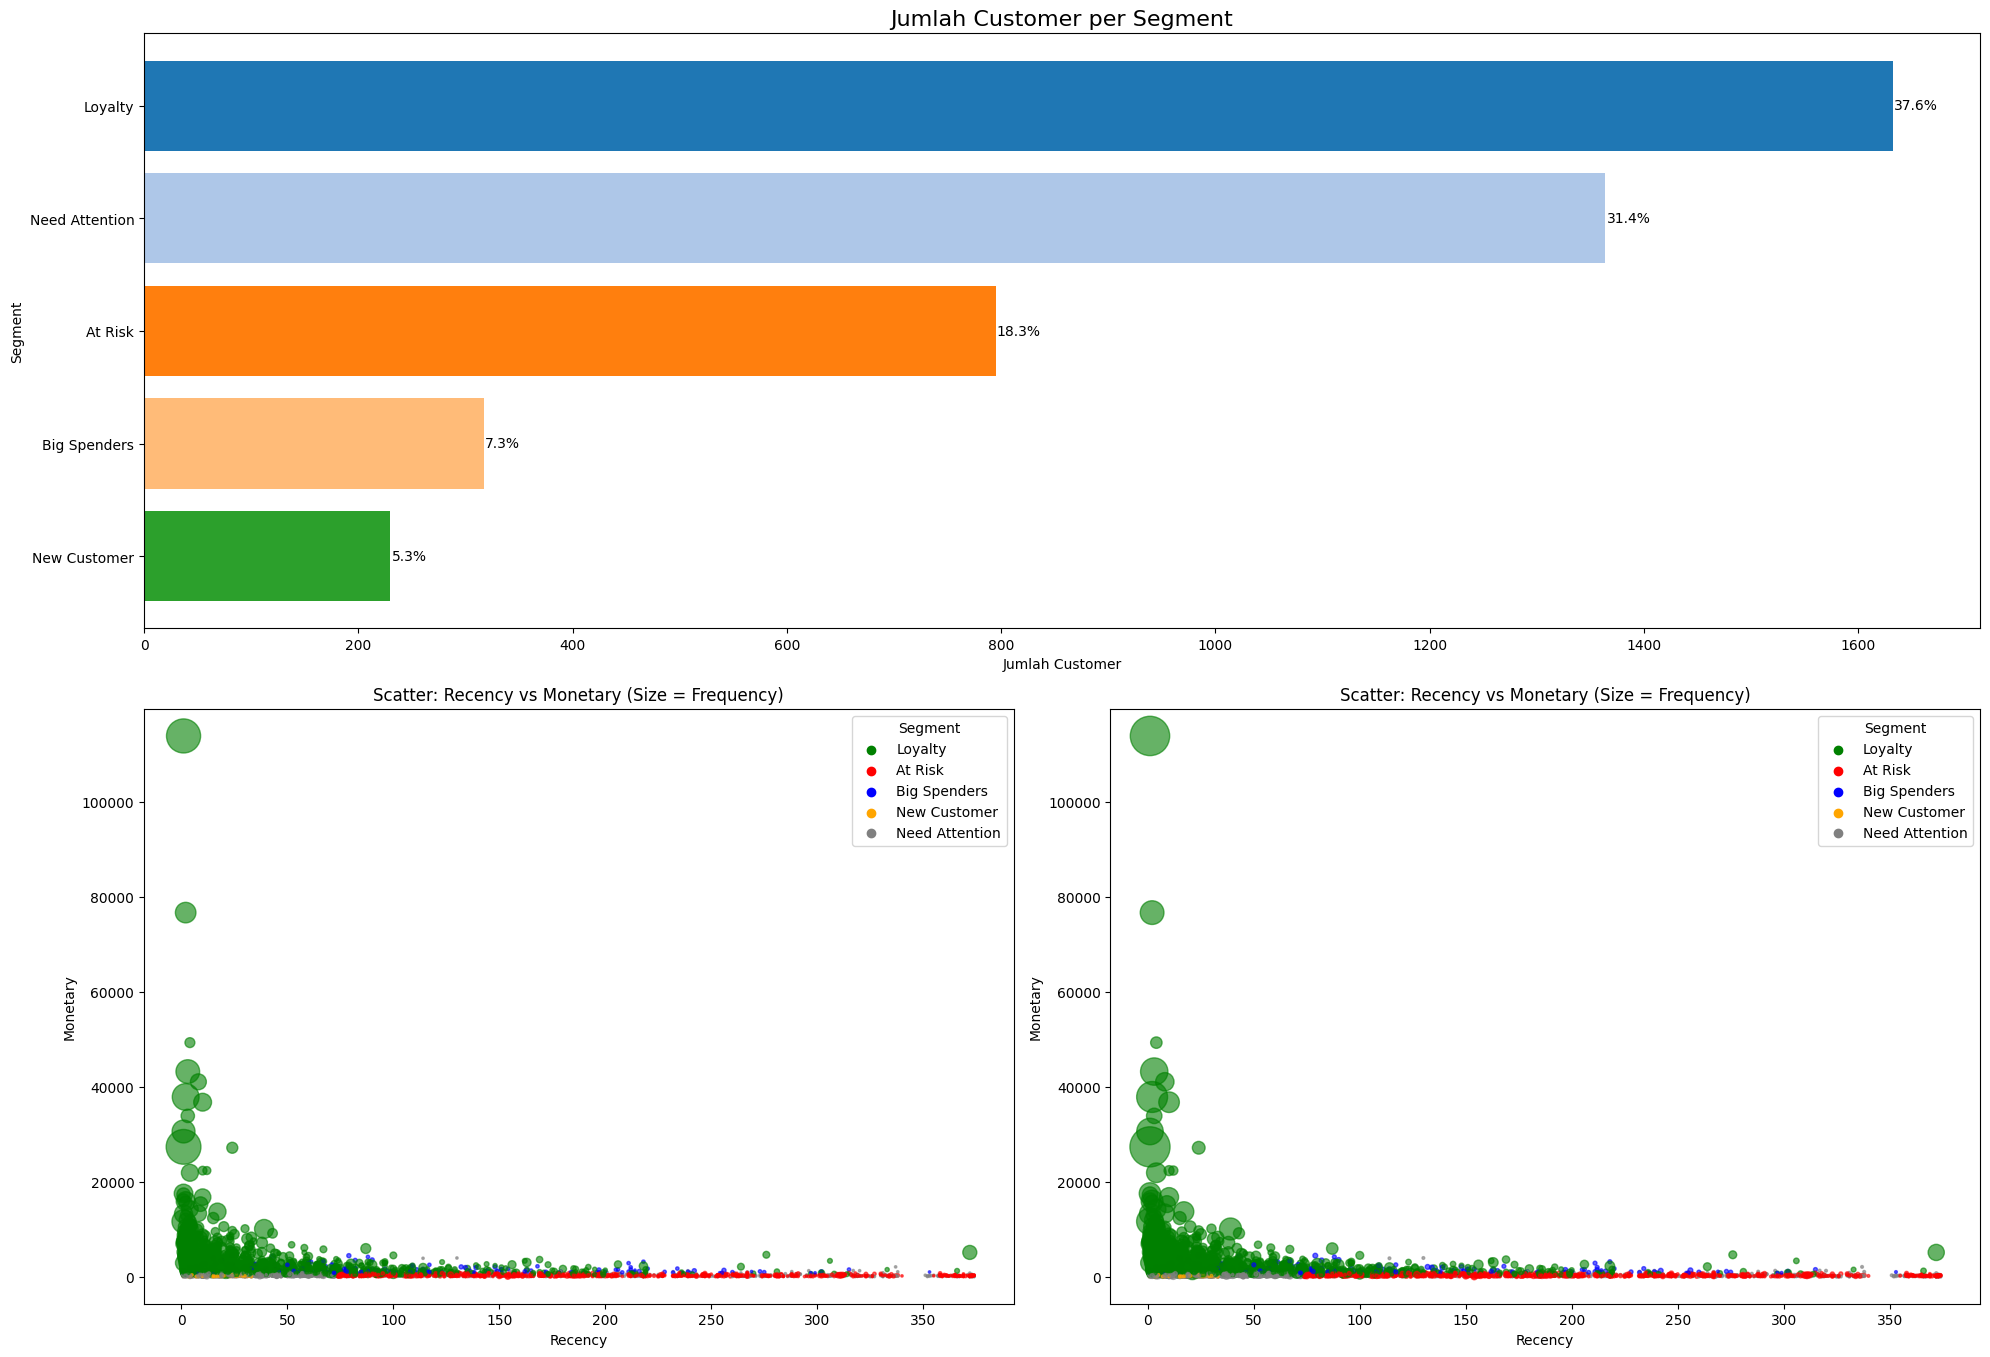

In [ ]:
plt.figure(figsize=(20, 20))   # ukuran keseluruhan diperbesar

# ==========================================
# 1. BARPLOT SEGMENT (diputar horizontal & diperbesar)
# ==========================================
plt.subplot(3, 1, 1)  # <-- barplot mengisi 1 baris penuh
segment_table = rfm_global['Segment'].value_counts().sort_values(ascending=False)
segment_percent = (segment_table / segment_table.sum()) * 100

colors1 = plt.cm.tab20(range(len(segment_table)))
bars = plt.barh(segment_table.index, segment_table.values, color=colors1)  # horizontal bar

# Tambah persentase
for bar, pct in zip(bars, segment_percent):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, f"{pct:.1f}%", va='center', fontsize=10)

plt.title('Jumlah Customer per Segment', fontsize=16)
plt.xlabel('Jumlah Customer')
plt.ylabel('Segment')
plt.gca().invert_yaxis()  # biar ranking terbesar di atas

# ==========================================
# 2. SCATTER R vs M (warna = Segment)
# ==========================================
plt.subplot(3, 2, 3)
colors2 = {
    "Loyalty": "green",
    "At Risk": "red",
    "Big Spenders": "blue",
    "New Customer": "orange",
    "Need Attention": "grey"
}
plt.scatter(
    rfm_global['Recency'],
    rfm_global['Monetary'],
    s=rfm_global['Frequency'] * 3,
    c=rfm_global['Segment'].map(colors2),
    alpha=0.6
)
plt.title('Scatter: Recency vs Monetary (Size = Frequency)')
plt.xlabel('Recency')
plt.ylabel('Monetary')
for seg, col in colors2.items():
    plt.scatter([], [], c=col, label=seg)
plt.legend(title="Segment")

# ==========================================
# 3. SCATTER R vs M (warna = Segment & size = Frequency)
# ==========================================
plt.subplot(3, 2, 4)
plt.scatter(
    rfm_global['Recency'], rfm_global['Monetary'],
    s=rfm_global['Frequency'] * 4,
    c=rfm_global['Segment'].map(colors2),
    alpha=0.6
)
plt.title('Scatter: Recency vs Monetary (Size = Frequency)')
plt.xlabel('Recency')
plt.ylabel('Monetary')
for seg, col in colors2.items():
    plt.scatter([], [], c=col, label=seg)
plt.legend(title="Segment")

plt.tight_layout()
plt.show()

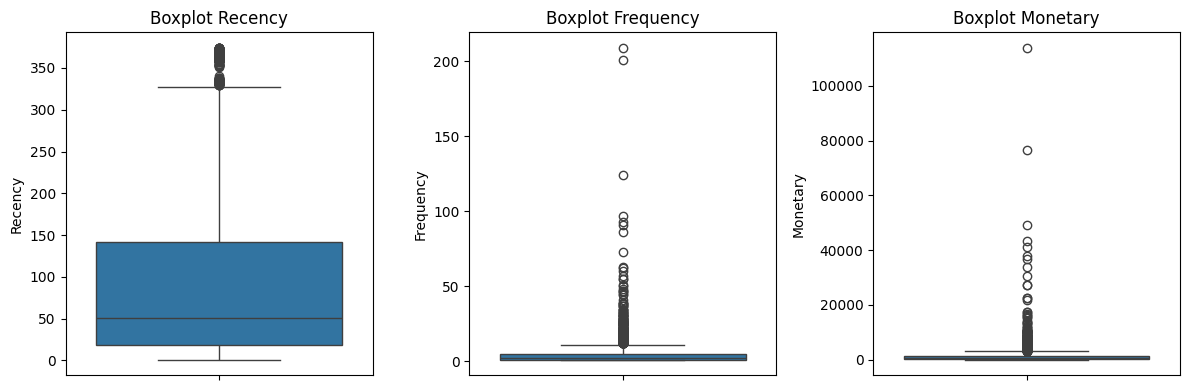

In [ ]:
# menampilkan tiga boxplot (Recency, Frequency, Monetary)
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.boxplot(y=rfm_global['Recency'])
plt.title("Boxplot Recency")

plt.subplot(1, 3, 2)
sns.boxplot(y=rfm_global['Frequency'])
plt.title("Boxplot Frequency")

plt.subplot(1, 3, 3)
sns.boxplot(y=rfm_global['Monetary'])
plt.title("Boxplot Monetary")

plt.tight_layout()
plt.show()


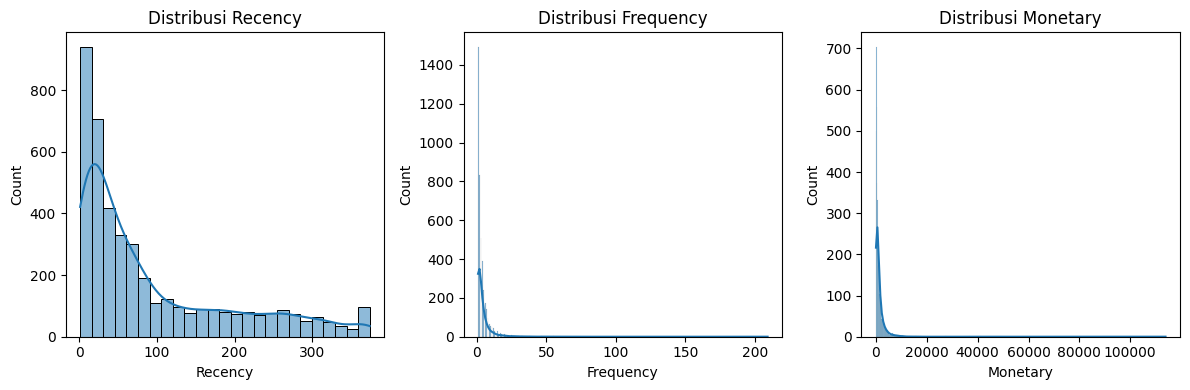

In [ ]:
# Melihat distribusi nilai

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(rfm_global['Recency'], kde=True)
plt.title("Distribusi Recency")

plt.subplot(1, 3, 2)
sns.histplot(rfm_global['Frequency'], kde=True)
plt.title("Distribusi Frequency")

plt.subplot(1, 3, 3)
sns.histplot(rfm_global['Monetary'], kde=True)
plt.title("Distribusi Monetary")

plt.tight_layout()
plt.show()


<Figure size 1200x400 with 0 Axes>

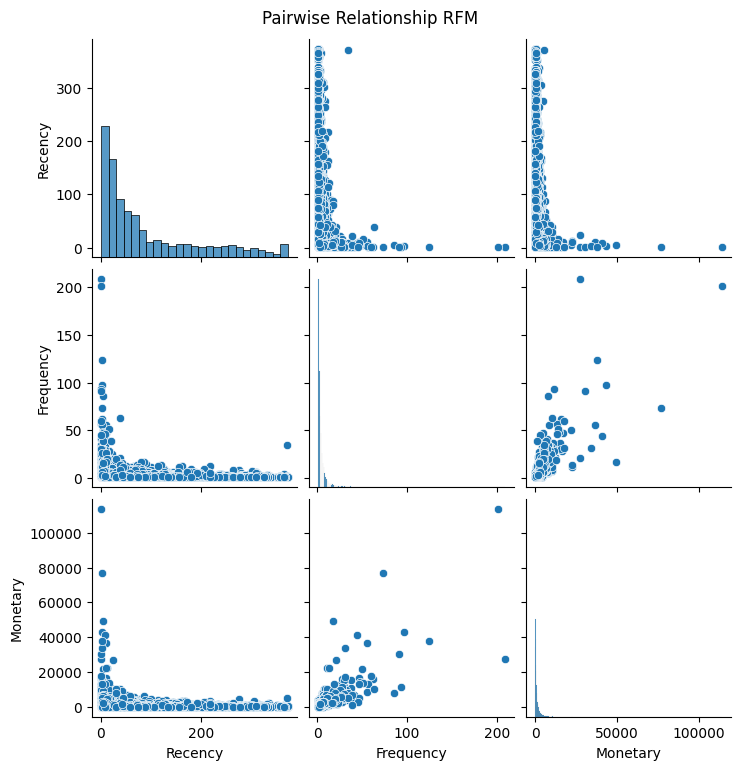

In [ ]:
# Melihat hubungan antar variabel
plt.figure(figsize=(12, 4))
sns.pairplot(rfm_global[['Recency', 'Frequency', 'Monetary']])
plt.suptitle("Pairwise Relationship RFM", y=1.02)
plt.show()


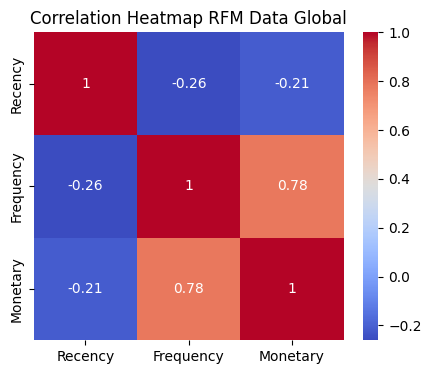

In [ ]:
# Melihat korelasinya
plt.figure(figsize=(5,4))
sns.heatmap(rfm_global[['Recency','Frequency','Monetary']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap RFM Data Global")
plt.show()

In [ ]:
print("===== Analisis Otomatis Berdasarkan Segment =====")
for seg, count in segment_table.items():
    pct = (count / segment_table.sum()) * 100
    print(f"- {seg}: {count} customer ({pct:.1f}%)")

print("\n===== Insight =====")
print(f"Segmen terbesar  : {segment_table.idxmax()} ({segment_percent.max():.1f}%)")
print(f"Segmen terkecil  : {segment_table.idxmin()} ({segment_percent.min():.1f}%)")

if 'At Risk' in segment_table.index:
    print("Pelanggan yang berisiko hilang (At Risk) perlu kampanye win back.")
if 'Loyalty' in segment_table.index:
    print("Pelanggan Loyal perlu dijaga dengan program reward / membership.")
if 'Big Spenders' in segment_table.index:
    print("Big Spenders berpotensi untuk upselling & cross-selling.")
if 'New Customer' in segment_table.index:
    print("Pelanggan baru butuh onboarding & edukasi produk.")
if 'Need Attention' in segment_table.index:
    print("Need Attention butuh follow-up & promosi personalisasi.")

===== Analisis Otomatis Berdasarkan Segment =====
- Loyalty: 1632 customer (37.6%)
- Need Attention: 1364 customer (31.4%)
- At Risk: 795 customer (18.3%)
- Big Spenders: 317 customer (7.3%)
- New Customer: 230 customer (5.3%)

===== Insight =====
Segmen terbesar  : Loyalty (37.6%)
Segmen terkecil  : New Customer (5.3%)
Pelanggan yang berisiko hilang (At Risk) perlu kampanye win back.
Pelanggan Loyal perlu dijaga dengan program reward / membership.
Big Spenders berpotensi untuk upselling & cross-selling.
Pelanggan baru butuh onboarding & edukasi produk.
Need Attention butuh follow-up & promosi personalisasi.


### 6.2 RFM untuk Data Lokal


#### 6.2.1 Menghitung Nilai RFM Data Lokal


In [ ]:
# menghitung RFM data local
rfm_local = df_local.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

rfm_local.columns = ['CustomerID','Recency','Frequency','Monetary']
rfm_local.head(10)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,42.075
1,12747.0,2,11,2758.435
2,12748.0,1,209,27343.555
3,12749.0,4,5,3944.310
4,12820.0,3,4,942.340
5,12821.0,214,1,92.720
6,12822.0,71,2,888.955
7,12823.0,75,5,210.375
8,12824.0,60,1,391.495
9,12826.0,3,7,1474.720


#### 6.2.2 Mengubah Nilai RFM Menjadi Skor RFM (R-Score, F-Score, M-Score) dengan Skala 1–5

In [ ]:
# Recency: makin kecil makin bagus → score tinggi
rfm_local['R_Score'] = pd.qcut(rfm_local['Recency'], 5, labels=[5,4,3,2,1]).astype(int)

# Frequency: makin besar makin bagus
rfm_local['F_Score'] = pd.qcut(rfm_local['Frequency'].rank(method="first"),
                               5, labels=[1,2,3,4,5]).astype(int)

# Monetary: makin besar makin bagus
rfm_local['M_Score'] = pd.qcut(rfm_local['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)


#### 6.2.3 Mengelompokkan Pelanggan (Customer Segmentation) Berdasarkan Perilaku

In [ ]:
# Menjumlahkan score R + F + M
rfm_local['RFM_Score'] = rfm_local[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

# Menggabungkan R, F, M menjadi satu string
rfm_local['RFM_Score_Str'] = (
    rfm_local['R_Score'].astype(str) +
    rfm_local['F_Score'].astype(str) +
    rfm_local['M_Score'].astype(str)
)


In [ ]:
def segment_customer(row):

    # 1″ NEW CUSTOMER → Recency tinggi (baru belanja), Frequency dan Monetary masih rendah
    if row['R_Score'] >= 4 and row['F_Score'] <= 2 and row['M_Score'] <= 2:
        return 'New Customer'

    # 2″ LOYAL → Belanja sering
    if row['F_Score'] >= 4 and row['M_Score'] >= 3:
        return 'Loyalty'

    # 3″ BIG SPENDER → Belanja besar (Monetary tinggi), meskipun tidak sering
    if row['M_Score'] >= 4 and row['F_Score'] >= 2:
        return 'Big Spenders'

    # 4″ AT RISK → Sudah lama tidak belanja (Recency rendah)
    if row['R_Score'] <= 2 and row['F_Score'] >= 2:
        return 'At Risk'

    # Default fallback
    return 'Need Attention'

# Terapkan ke RFM
rfm_local['Segment'] = rfm_local.apply(segment_customer, axis=1)

rfm_local.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Score_Str,Segment
0,12346.0,326,1,42.075,1,1,1,3,111,Need Attention
1,12747.0,2,11,2758.435,5,5,5,15,555,Loyalty
2,12748.0,1,209,27343.555,5,5,5,15,555,Loyalty
3,12749.0,4,5,3944.310,5,4,5,14,545,Loyalty
4,12820.0,3,4,942.340,5,4,4,13,544,Loyalty


#### 6.2.4 Visualisasi RFM Data Lokal

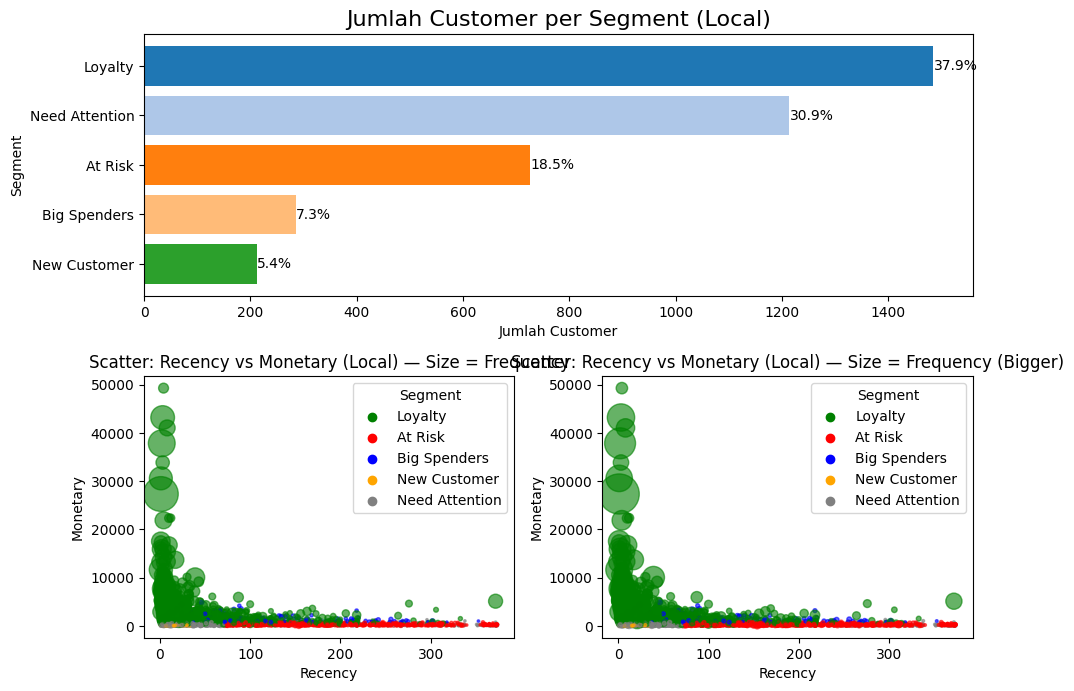

In [ ]:
plt.figure(figsize=(10, 10))   # ukuran keseluruhan diperbesar

# ==========================================
# 1. BARPLOT SEGMENT (diputar horizontal & diperbesar)
# ==========================================
plt.subplot(3, 1, 1)
segment_table = rfm_local['Segment'].value_counts().sort_values(ascending=False)
segment_percent = (segment_table / segment_table.sum()) * 100

colors1 = plt.cm.tab20(range(len(segment_table)))
bars = plt.barh(segment_table.index, segment_table.values, color=colors1)

# Tambah persentase
for bar, pct in zip(bars, segment_percent):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, f"{pct:.1f}%", va='center', fontsize=10)

plt.title('Jumlah Customer per Segment (Local)', fontsize=16)
plt.xlabel('Jumlah Customer')
plt.ylabel('Segment')
plt.gca().invert_yaxis()

# ==========================================
# 2. SCATTER R vs M (warna = Segment)
# ==========================================
plt.subplot(3, 2, 3)
colors2 = {
    "Loyalty": "green",
    "At Risk": "red",
    "Big Spenders": "blue",
    "New Customer": "orange",
    "Need Attention": "grey"
}

plt.scatter(
    rfm_local['Recency'],
    rfm_local['Monetary'],
    s=rfm_local['Frequency'] * 3,
    c=rfm_local['Segment'].map(colors2),
    alpha=0.6
)

plt.title('Scatter: Recency vs Monetary (Local) — Size = Frequency')
plt.xlabel('Recency')
plt.ylabel('Monetary')

for seg, col in colors2.items():
    plt.scatter([], [], c=col, label=seg)
plt.legend(title="Segment")

# ==========================================
# 3. SCATTER R vs M (warna = Segment & size = Frequency)
# ==========================================
plt.subplot(3, 2, 4)
plt.scatter(
    rfm_local['Recency'], rfm_local['Monetary'],
    s=rfm_local['Frequency'] * 4,
    c=rfm_local['Segment'].map(colors2),
    alpha=0.6
)

plt.title('Scatter: Recency vs Monetary (Local) — Size = Frequency (Bigger)')
plt.xlabel('Recency')
plt.ylabel('Monetary')

for seg, col in colors2.items():
    plt.scatter([], [], c=col, label=seg)
plt.legend(title="Segment")

plt.tight_layout()
plt.show()


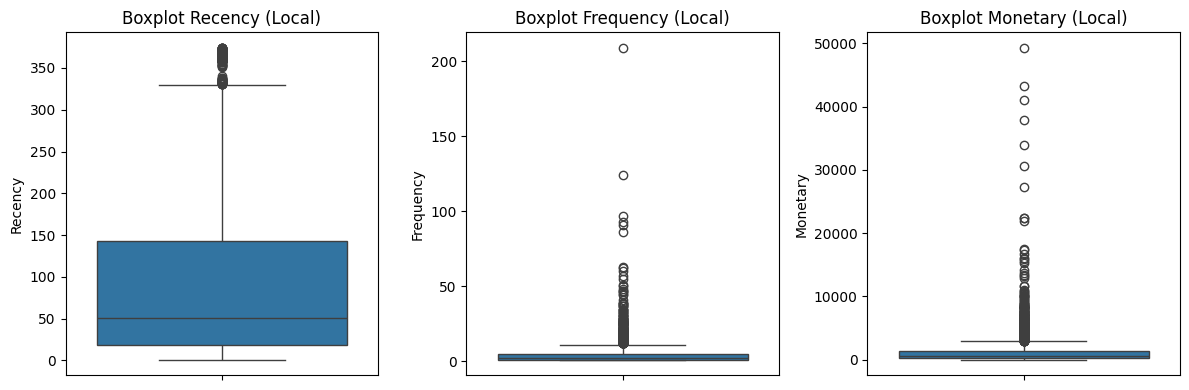

In [ ]:
# Menampilkan boxplot dari Recency, Frequency, Monetary (Local Data)
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.boxplot(y=rfm_local['Recency'])
plt.title("Boxplot Recency (Local)")

plt.subplot(1, 3, 2)
sns.boxplot(y=rfm_local['Frequency'])
plt.title("Boxplot Frequency (Local)")

plt.subplot(1, 3, 3)
sns.boxplot(y=rfm_local['Monetary'])
plt.title("Boxplot Monetary (Local)")

plt.tight_layout()
plt.show()


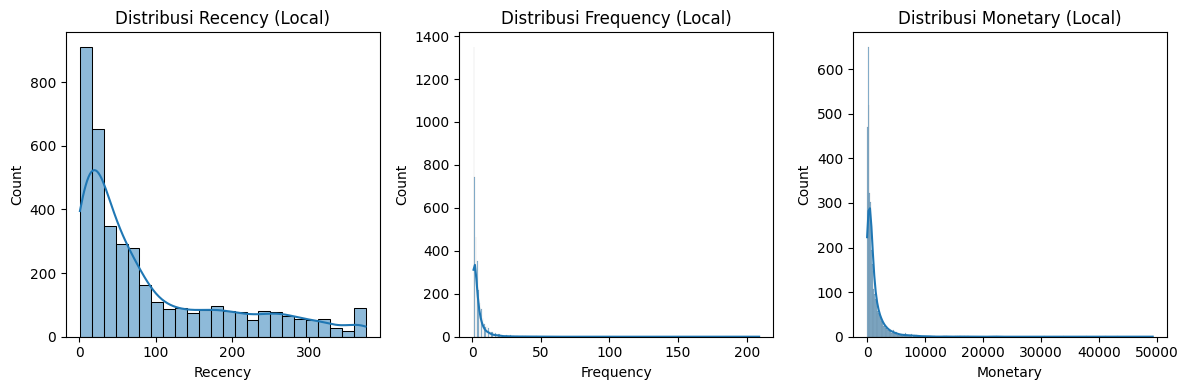

In [ ]:
# Melihat distribusi nilai (Local Data)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(rfm_local['Recency'], kde=True)
plt.title("Distribusi Recency (Local)")

plt.subplot(1, 3, 2)
sns.histplot(rfm_local['Frequency'], kde=True)
plt.title("Distribusi Frequency (Local)")

plt.subplot(1, 3, 3)
sns.histplot(rfm_local['Monetary'], kde=True)
plt.title("Distribusi Monetary (Local)")

plt.tight_layout()
plt.show()


<Figure size 600x200 with 0 Axes>

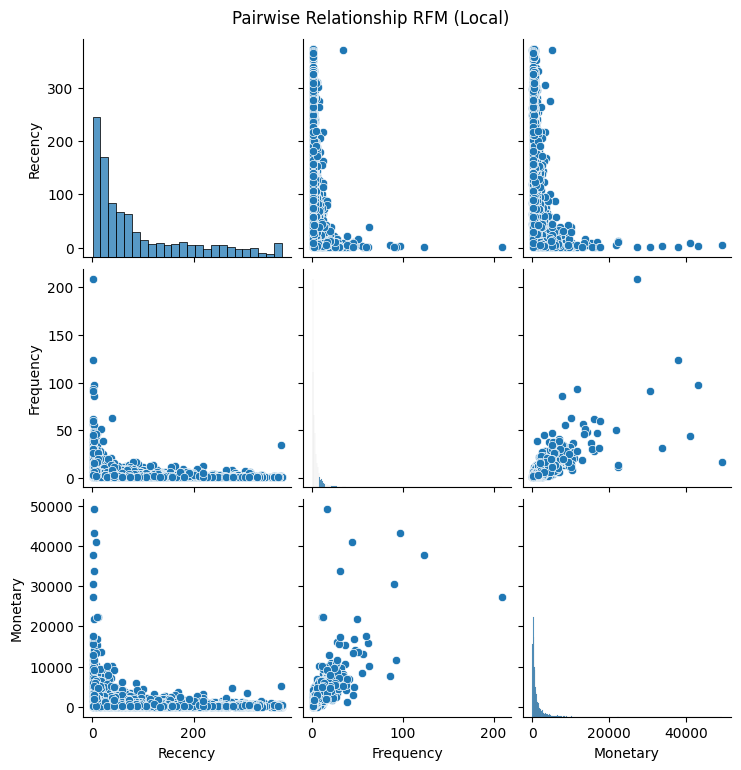

In [ ]:
# Melihat hubungan antar variabel
plt.figure(figsize=(6, 2))
sns.pairplot(rfm_local[['Recency', 'Frequency', 'Monetary']])
plt.suptitle("Pairwise Relationship RFM (Local)", y=1.02)
plt.show()


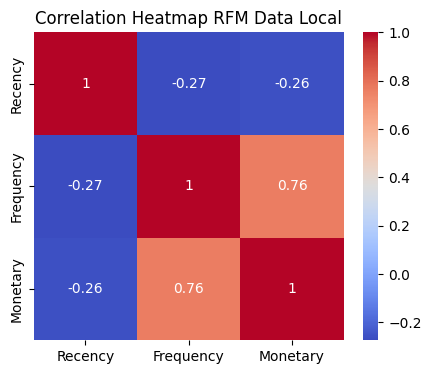

In [ ]:
# Melihat korelasinya
plt.figure(figsize=(5,4))
sns.heatmap(rfm_local[['Recency','Frequency','Monetary']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap RFM Data Local")
plt.show()

In [ ]:
# ==========================================
# ANALISIS OTOMATIS RFM LOCAL
# ==========================================
segment_table = rfm_local['Segment'].value_counts().sort_values(ascending=False)
segment_percent = (segment_table / segment_table.sum()) * 100

print("===== Analisis Otomatis Berdasarkan Segment (RFM Local) =====")
for seg, count in segment_table.items():
    pct = (count / segment_table.sum()) * 100
    print(f"- {seg}: {count} customer ({pct:.1f}%)")

print("\n===== Insight =====")
print(f"Segmen terbesar  : {segment_table.idxmax()} ({segment_percent.max():.1f}%)")
print(f"Segmen terkecil  : {segment_table.idxmin()} ({segment_percent.min():.1f}%)")

# Insight tambahan berdasarkan keberadaan segmen
if 'At Risk' in segment_table.index:
    print("Pelanggan yang berisiko hilang (At Risk) perlu kampanye win-back, seperti diskon reaktivasi atau reminder pembelian.")
if 'Loyalty' in segment_table.index:
    print("Pelanggan Loyal perlu dijaga dengan program reward, prioritas layanan, atau membership eksklusif.")
if 'Big Spenders' in segment_table.index:
    print("Big Spenders berpotensi untuk upselling & cross-selling — tawarkan bundling atau produk premium.")
if 'New Customer' in segment_table.index:
    print("Pelanggan baru membutuhkan onboarding & edukasi produk agar pembelian tidak hanya satu kali.")
if 'Need Attention' in segment_table.index:
    print("Need Attention memerlukan follow-up personal, kupon penawaran, atau WhatsApp direct promo untuk menghindari churn.")

===== Analisis Otomatis Berdasarkan Segment (RFM Local) =====
- Loyalty: 1484 customer (37.9%)
- Need Attention: 1213 customer (30.9%)
- At Risk: 726 customer (18.5%)
- Big Spenders: 285 customer (7.3%)
- New Customer: 212 customer (5.4%)

===== Insight =====
Segmen terbesar  : Loyalty (37.9%)
Segmen terkecil  : New Customer (5.4%)
Pelanggan yang berisiko hilang (At Risk) perlu kampanye win-back, seperti diskon reaktivasi atau reminder pembelian.
Pelanggan Loyal perlu dijaga dengan program reward, prioritas layanan, atau membership eksklusif.
Big Spenders berpotensi untuk upselling & cross-selling — tawarkan bundling atau produk premium.
Pelanggan baru membutuhkan onboarding & edukasi produk agar pembelian tidak hanya satu kali.
Need Attention memerlukan follow-up personal, kupon penawaran, atau WhatsApp direct promo untuk menghindari churn.


### 6.3 Standarisasi Nilai RFM

In [ ]:
# menstandarkan (menormalisasi) nilai RFM sebelum dilakukan clustering
scaler = MinMaxScaler()

rfm_global_scaled = scaler.fit_transform(rfm_global[['Recency','Frequency','Monetary']])
rfm_local_scaled = scaler.fit_transform(rfm_local[['Recency','Frequency','Monetary']])

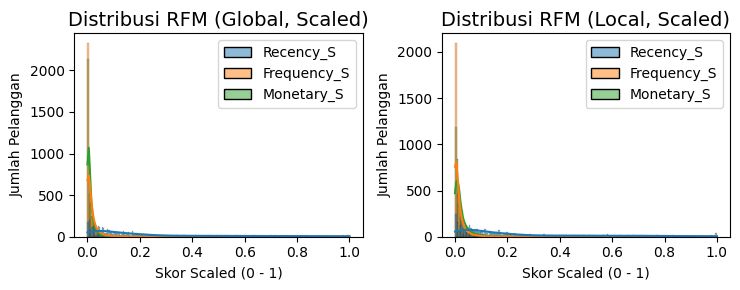

In [ ]:
# ubah hasil scaler menjadi dataframe agar mudah divisualisasikan
rfm_global_scaled_df = pd.DataFrame(rfm_global_scaled, columns=["Recency_S", "Frequency_S", "Monetary_S"])
rfm_local_scaled_df = pd.DataFrame(rfm_local_scaled, columns=["Recency_S", "Frequency_S", "Monetary_S"])

plt.figure(figsize=(7.5,3))

plt.subplot(1,2,1)
sns.histplot(rfm_global_scaled_df, kde=True, palette="tab10")
plt.title("Distribusi RFM (Global, Scaled)", fontsize=14)
plt.xlabel("Skor Scaled (0 - 1)")
plt.ylabel("Jumlah Pelanggan")

plt.subplot(1,2,2)
sns.histplot(rfm_local_scaled_df, kde=True, palette="tab10")
plt.title("Distribusi RFM (Local, Scaled)", fontsize=14)
plt.xlabel("Skor Scaled (0 - 1)")
plt.ylabel("Jumlah Pelanggan")

plt.tight_layout()
plt.show()

# 7. K-Means Clustering





## 7.1 Mencari Nilai K

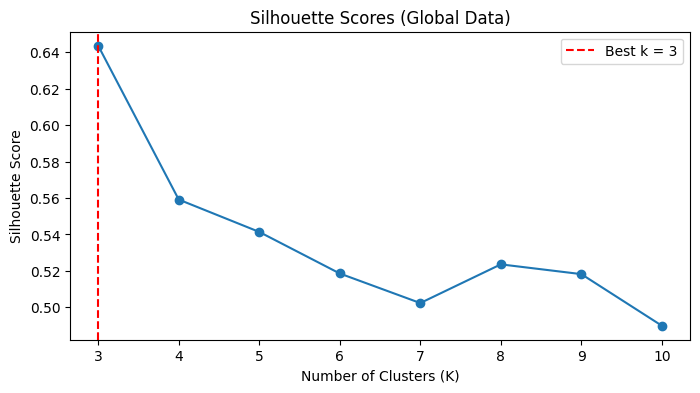

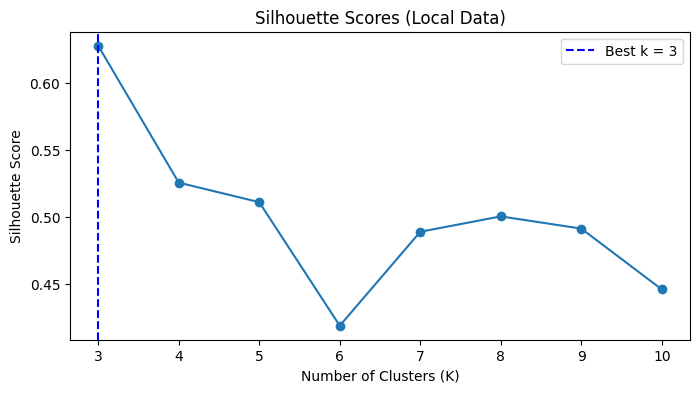

In [ ]:
K_range = range(3, 11)

def get_best_k(data_scaled):
    silhouette_scores = []
    inertia_scores = [] # To store SSE values

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        labels = kmeans.fit_predict(data_scaled)
        score = silhouette_score(data_scaled, labels)
        silhouette_scores.append(score)
        inertia_scores.append(kmeans.inertia_) # Store SSE

    best_k_original = K_range[np.argmax(silhouette_scores)]
    return best_k_original, silhouette_scores, inertia_scores # Return SSE as well

# Get silhouette and SSE scores
best_k_global_original, scores_global, sse_global = get_best_k(rfm_global_scaled)
best_k_local_original, scores_local, sse_local = get_best_k(rfm_local_scaled)

# Use the best k identified by the silhouette score
best_k_global = best_k_global_original
best_k_local = best_k_local_original


plt.figure(figsize=(8,4))
plt.plot(K_range, scores_global, marker='o')
plt.axvline(x=best_k_global, linestyle='--', color='red', label=f'Best k = {best_k_global}')
plt.title("Silhouette Scores (Global Data)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
plt.plot(K_range, scores_local, marker='o')
plt.axvline(x=best_k_local, linestyle='--', color='blue', label=f'Best k = {best_k_local}')
plt.title("Silhouette Scores (Local Data)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()


## 7.2 Clustering dengan K-Means





In [ ]:
kmeans_global = KMeans(n_clusters=best_k_global, random_state=42, n_init='auto')
kmeans_local = KMeans(n_clusters=best_k_local, random_state=42, n_init='auto')

rfm_global['Cluster'] = kmeans_global.fit_predict(rfm_global_scaled)
rfm_local['Cluster'] = kmeans_local.fit_predict(rfm_local_scaled)

### **7.2.1 Cluster K-Means – Data Global**


In [ ]:
cluster_characteristics_global = rfm_global.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()
print("Rata-rata Nilai RFM per Cluster (Global Data):")
display(cluster_characteristics_global)

Rata-rata Nilai RFM per Cluster (Global Data):


,Cluster,Recency,Frequency,Monetary
0,0,32.163799,5.470750,1726.358010
1,1,294.431310,1.354633,324.049042
2,2,153.400744,2.215881,580.629964


Interpretasi Cluster K-Means – Data Global

Cluster 0

Recency rata-rata: 32 hari → pelanggan baru belanja

Frequency: 5.47 → cukup sering

Monetary: 1.726 → sangat tinggi
- Kesimpulan: Ini adalah kelompok pelanggan aktif bernilai tinggi. Mereka baru belanja, sering bertransaksi, dan mengeluarkan total belanja terbesar. Kelompok ini sejalan dengan segmen seperti Loyalty atau Big Spenders.

Cluster 1

Recency rata-rata: 294 hari → sudah lama sekali tidak belanja

Frequency: 1.35 → jarang

Monetary: 324 → terendah
- Kesimpulan: Kelompok ini masuk kategori pelanggan berisiko tinggi. Mereka hampir tidak aktif lagi dan cenderung mendekati churn. Mirip dengan segmen At Risk atau Need Attention.

Cluster 2

Recency rata-rata: 153 hari → cukup lama tidak bertransaksi

Frequency: 2.21 → jarang

Monetary: 580 → menengah
- Kesimpulan: Kelompok ini adalah pelanggan kurang aktif. Aktivitas mereka menurun dalam beberapa waktu terakhir dan total belanja mereka tidak terlalu besar.

### 7.2.2 Confusion Matrix Data Global

Cluster,0,1,2
Segment,,,
At Risk,110,298,387
Big Spenders,231,20,66
Loyalty,1471,15,146
Need Attention,864,293,207
New Customer,230,0,0


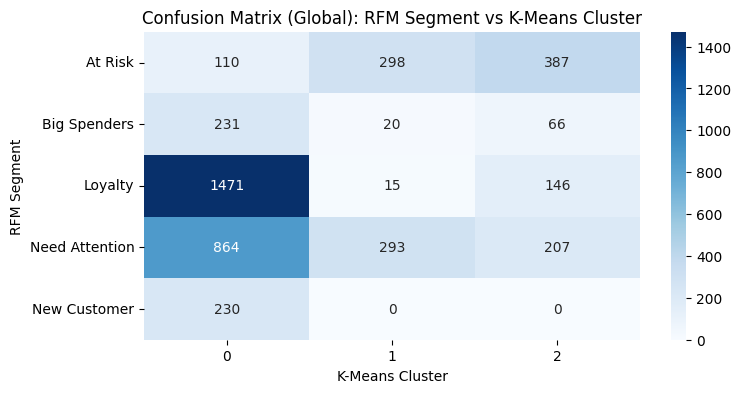

In [ ]:
# Buat confusion matrix
segment_labels_global = sorted(rfm_global['Segment'].unique().tolist())
cluster_labels_global = sorted(rfm_global['Cluster'].unique().astype(str).tolist())

cm_global = pd.crosstab(index=rfm_global['Segment'],
                        columns=rfm_global['Cluster'].astype(str))

# Tampilkan tabel
display(cm_global)

# Heatmap
plt.figure(figsize=(8,4))
sns.heatmap(cm_global, annot=True, fmt='d', cmap='Blues',
            xticklabels=cluster_labels_global, yticklabels=segment_labels_global)
plt.title("Confusion Matrix (Global): RFM Segment vs K-Means Cluster")
plt.xlabel("K-Means Cluster")
plt.ylabel("RFM Segment")
plt.show()

### **7.2.3 Cluster K-Means – Data Lokal**




In [ ]:
cluster_characteristics_local = rfm_local.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()
print("Rata-rata Nilai RFM per Cluster (Local Data):")
display(cluster_characteristics_local)

Rata-rata Nilai RFM per Cluster (Local Data):


,Cluster,Recency,Frequency,Monetary
0,0,293.659498,1.365591,306.873970
1,1,154.286494,2.230559,547.104353
2,2,32.149106,5.419932,1592.036943


Interpretasi Cluster K-Means – Data Lokal

Cluster 0

Recency: 293 hari → sangat lama tidak belanja

Frequency: 1.36 → rendah

Monetary: 306 → terendah
- Kesimpulan: Karakteristiknya sangat mirip dengan Cluster 1 global. Ini adalah kelompok pelanggan berisiko tinggi yang sudah hampir tidak melakukan transaksi lagi.

Cluster 1

Recency: 154 hari

Frequency: 2.23

Monetary: 547
- Kesimpulan: Ini adalah kelompok pelanggan kurang aktif. Mereka masih berpotensi diaktifkan kembali karena belum sepenuhnya hilang.

Cluster 2

Recency: 32 hari

Frequency: 5.41

Monetary: 1.592
- Kesimpulan: Ini kelompok pelanggan aktif bernilai tinggi, sama seperti Cluster 0 pada data global. Mereka rutin melakukan transaksi dan memberikan kontribusi nilai terbesar.

### [7.2.4 Confusion Matrix Data Local](https://)

Cluster,0,1,2
Segment,,,
At Risk,265,347,114
Big Spenders,20,57,208
Loyalty,15,140,1329
Need Attention,258,189,766
New Customer,0,0,212


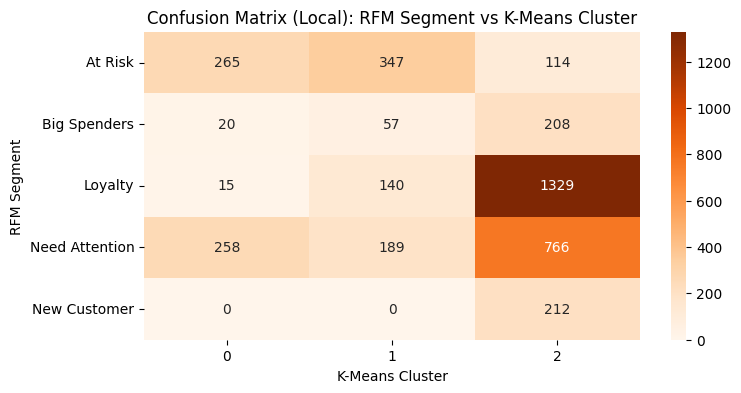

In [ ]:
# === CONFUSION MATRIX LOCAL ===

# Pastikan cluster sudah dibuat
kmeans_local = KMeans(n_clusters=best_k_local, random_state=42, n_init='auto')
rfm_local['Cluster'] = kmeans_local.fit_predict(rfm_local_scaled)

# Buat confusion matrix
segment_labels_local = sorted(rfm_local['Segment'].unique().tolist())
cluster_labels_local = sorted(rfm_local['Cluster'].unique().astype(str).tolist())

cm_local = pd.crosstab(index=rfm_local['Segment'],
                       columns=rfm_local['Cluster'].astype(str))

# Tampilkan tabel
display(cm_local)

# Heatmap
plt.figure(figsize=(8,4))
sns.heatmap(cm_local, annot=True, fmt='d', cmap='Oranges',
            xticklabels=cluster_labels_local, yticklabels=segment_labels_local)
plt.title("Confusion Matrix (Local): RFM Segment vs K-Means Cluster")
plt.xlabel("K-Means Cluster")
plt.ylabel("RFM Segment")
plt.show()


## 8. Interpretasi Hasil


## 8.1 Interpretasi Data Global

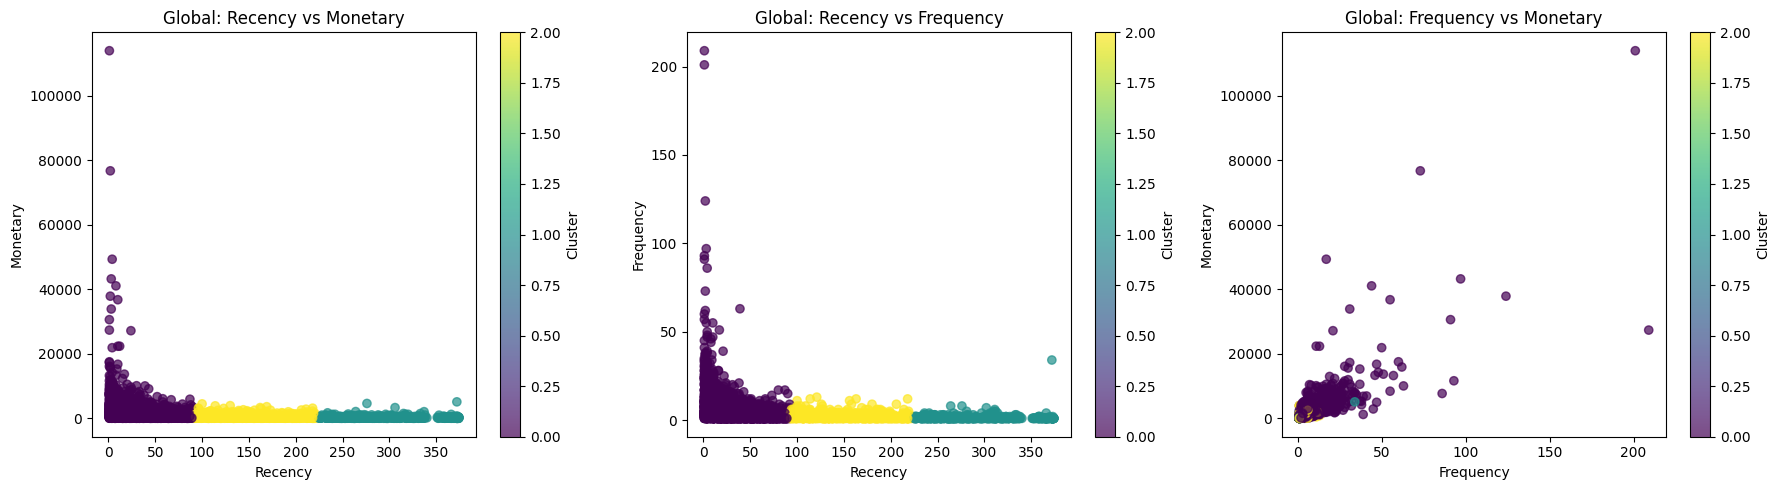

In [ ]:
plt.figure(figsize=(18, 5))

# Scatter Plot Recency vs Monetary (Global)
plt.subplot(1, 3, 1)
plt.scatter(rfm_global['Recency'], rfm_global['Monetary'], c=rfm_global['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.title("Global: Recency vs Monetary")
plt.colorbar(label='Cluster')

# Scatter Plot Recency vs Frequency (Global)
plt.subplot(1, 3, 2)
plt.scatter(rfm_global['Recency'], rfm_global['Frequency'], c=rfm_global['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.title("Global: Recency vs Frequency")
plt.colorbar(label='Cluster')

# Scatter Plot Frequency vs Monetary (Global)
plt.subplot(1, 3, 3)
plt.scatter(rfm_global['Frequency'], rfm_global['Monetary'], c=rfm_global['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel("Frequency")
plt.ylabel("Monetary")
plt.title("Global: Frequency vs Monetary")
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()

## 8.2 Interpretasi Data lokal

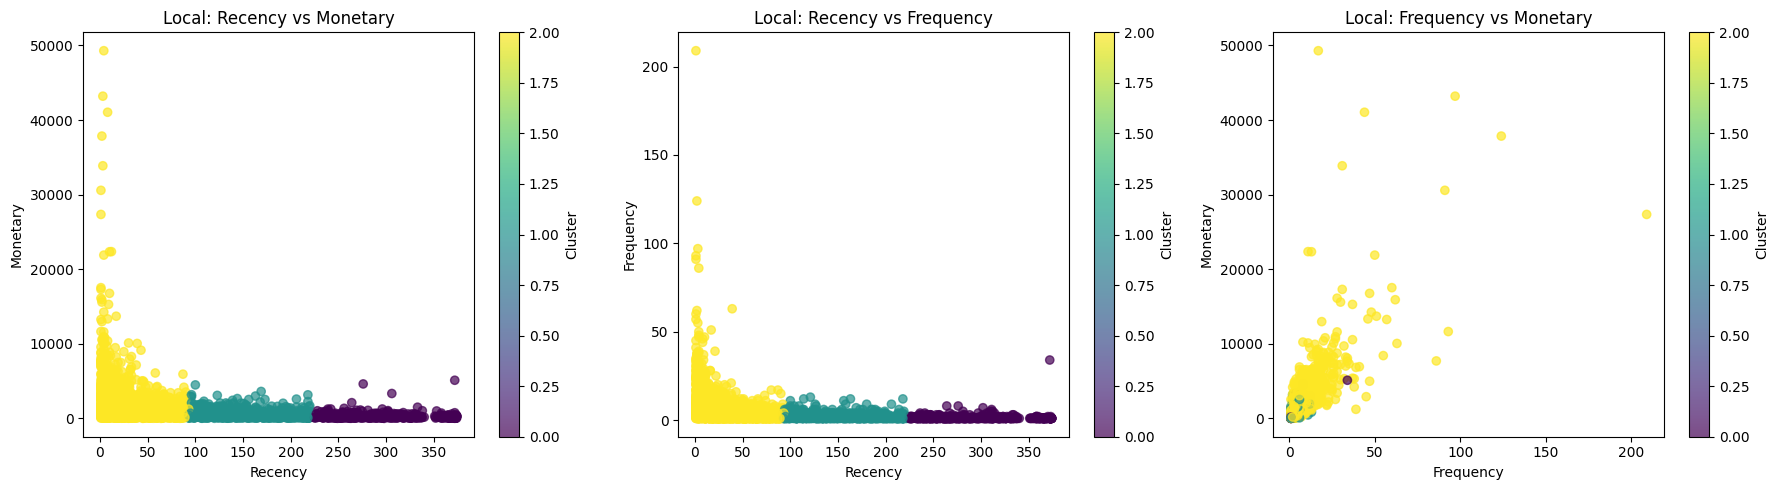

In [ ]:
plt.figure(figsize=(18, 5))

# Scatter Plot Recency vs Monetary (Local)
plt.subplot(1, 3, 1)
plt.scatter(rfm_local['Recency'], rfm_local['Monetary'], c=rfm_local['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.title("Local: Recency vs Monetary")
plt.colorbar(label='Cluster')

# Scatter Plot Recency vs Frequency (Local)
plt.subplot(1, 3, 2)
plt.scatter(rfm_local['Recency'], rfm_local['Frequency'], c=rfm_local['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.title("Local: Recency vs Frequency")
plt.colorbar(label='Cluster')

# Scatter Plot Frequency vs Monetary (Local)
plt.subplot(1, 3, 3)
plt.scatter(rfm_local['Frequency'], rfm_local['Monetary'], c=rfm_local['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel("Frequency")
plt.ylabel("Monetary")
plt.title("Local: Frequency vs Monetary")
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files
rfm_global.to_csv('hasil_rfm_kmeans.csv', index=False)
files.download('hasil_rfm_kmeans.csv')
rfm_local.to_csv('hasil_rfm_kmeans_lokal.csv', index=False)
files.download('hasil_rfm_kmeans_lokal.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 9. Strategi Pemasaran

## 9.1 Strategi Pelanggan Global

- Membuat program VIP yang menawarkan berbagai keuntungan khusus, seperti akses lebih awal (early bird) untuk produk baru, voucher eksklusif, serta promo yang hanya tersedia untuk pelanggan VIP.
- Berikan promo pemicu impulsif seperti diskon besar, flash sale, event comeback, dan voucher pembelian berikutnya, serta program tebus murah untuk meningkatkan nilai transaksi.
- Bundling Produk dengan menggabungkan produk yang paling diminati dengan produk yang kurang diminati dalam satu paket penjualan.
- Tawarkan hadiah khusus bagi pelanggan yang berbelanja pada momen tertentu seperti akhir tahun atau event khusus brand.
- Tampilkan testimoni dan konten edukasi yang menunjukkan nilai serta cara penggunaan produk untuk meningkatkan kepercayaan dan membantu pelanggan memahami manfaatnya.

## 9.2 Strategi Pelanggan Lokal
- Promosi dan social proof dengan menggabungkan penggunaan testimoni, social proof, dan konten edukasi produk untuk meningkatkan kepercayaan pelanggan dan membantu mereka memahami manfaat produk.
- Promo penjualan & diskon seperti diskon tengah malam, voucher untuk pembelian berikutnya, dan bundling produk populer dengan produk kurang diminati untuk meningkatkan nilai transaksi.
- Mengadakan kompetisi berhadiah dengan syarat tertentu (misal minimum pembelian) dan program belanja berhadiah, terutama pada periode akhir tahun, untuk mendorong interaksi dan loyalitas pelanggan.
- Membuat  program loyalty VIP lokal yang memberikan keuntungan eksklusif, seperti akses awal ke produk baru dan penawaran khusus bagi member.
- Berikan hadiah atau penghargaan tahunan untuk pelanggan sebagai bentuk apresiasi, memperkuat hubungan jangka panjang, dan meningkatkan retensi.